# Metadata analysis
Copyright (C) 2021 ServiceNow, Inc.

This notebook provides the raw analysis of the GEOSCAN metadata, cleans it, and produces a large and small processed version from the the two input metadata files:

```
/nrcan_p2/data/01_raw/20201006/geoscan/GEOSCAN-extract-20200211144755.xml ->
/nrcan_p2/data/01_raw/20201006/geoscan/GEOSCAN-extract-20200211144755.xml_processed_Feb29.parquet
```

```
/nrcan_p2/data/01_raw/20201006/geoscan/EAIDown.xml ->
/nrcan_p2/data/01_raw/20201006/geoscan/EAIDown.xml_processed_Feb29.parquet
```

## Load the two metadata xml files... 

In [224]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [225]:
import sys
sys.path.append('..')
import nrcan_p2.metadata_processing.read_metadata as read_metadata

In [226]:
schema_file = '/nrcan_p2/data/01_raw/20201006/geoscan/geoscan.xsd'
# xml_file = 'data/nrcan/GEOSCAN_OSDP_EXTRACT_updates-utf8.xml'
xml_file = '/nrcan_p2/data/01_raw/20201006/geoscan/EAIDown.xml'

df_s = read_metadata.convert_xml_to_dataframe_and_save(xml_schema=schema_file, xml_file=xml_file,
                                       validate=False)

Loading existing df file...


In [227]:
schema_file = '/nrcan_p2/data/01_raw/20201006/geoscan/geoscan_flex.xsd'
xml_file_large = '/nrcan_p2/data/01_raw/20201006/geoscan/GEOSCAN-extract-20200211144755.xml'
df_s_large = read_metadata.convert_xml_to_dataframe_and_save(xml_schema=schema_file, xml_file=xml_file_large,
                                       validate=False, ITEM_PREFIX='{https://geoscan.nrcan.gc.ca/schema/osdp_feed/1.0/}', 
                                                             SUB_KEY_PREFIX='{http://purl.org/dc/elements/1.1/}')

Loading existing df file...


In [228]:
df_s_large.shape

(92663, 29)

In [229]:
df_s.shape

(12316, 29)

## Descriptions

In [230]:
df_s_large['{http://purl.org/dc/elements/1.1/}description_fr'].isnull().sum()

0

In [231]:
df_s['{http://purl.org/dc/elements/1.1/}description_fr'].isnull().sum()

0

In [232]:
df_s['{http://purl.org/dc/elements/1.1/}description_en'].isnull().sum()

0

In [233]:
df_s_large['{http://purl.org/dc/elements/1.1/}description_en'].isnull().sum()

0

**analysis** No null values in desc_en or desc_fr

In [234]:
df_s['{http://purl.org/dc/elements/1.1/}description_en'].str.len().describe()

count    12316.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: {http://purl.org/dc/elements/1.1/}description_en, dtype: float64

In [235]:
df_s_large['{http://purl.org/dc/elements/1.1/}description_en'].str.len().describe()

count    92663.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: {http://purl.org/dc/elements/1.1/}description_en, dtype: float64

In [236]:
df_s['{http://purl.org/dc/elements/1.1/}description_fr'].str.len().describe()

count    12316.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: {http://purl.org/dc/elements/1.1/}description_fr, dtype: float64

In [237]:
df_s_large['{http://purl.org/dc/elements/1.1/}description_en'].str.len().describe()

count    92663.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: {http://purl.org/dc/elements/1.1/}description_en, dtype: float64

**analysis** there is one description (or None description for each example) for both fr and en

In [238]:
df_s['desc_en'] = df_s['{http://purl.org/dc/elements/1.1/}description_en'].str[0] 
df_s_large['desc_en'] = df_s_large['{http://purl.org/dc/elements/1.1/}description_en'].str[0] 
df_s['desc_fr'] = df_s['{http://purl.org/dc/elements/1.1/}description_fr'].str[0] 
df_s_large['desc_fr'] = df_s_large['{http://purl.org/dc/elements/1.1/}description_fr'].str[0] 

In [239]:
a = df_s.desc_en.isnull().sum()
b = df_s.desc_en.shape[0]
print(f'Null values desc_en: {a}/{b} {a/b}')

Null values desc_en: 8610/12316 0.699090613835661


In [240]:
a = df_s.desc_fr.isnull().sum()
b = df_s.desc_fr.shape[0]
print(f'Null values desc_fr: {a}/{b} {a/b}')

Null values desc_fr: 10241/12316 0.8315199740175382


In [241]:
a = df_s_large.desc_en.isnull().sum()
b = df_s_large.desc_en.shape[0]
print(f'Null values desc_en (large): {a}/{b} {a/b}')

Null values desc_en (large): 72554/92663 0.7829878160646644


In [242]:
a = df_s_large.desc_fr.isnull().sum()
b = df_s_large.desc_fr.shape[0]
print(f'Null values desc_fr (large): {a}/{b} {a/b}')

Null values desc_fr (large): 83132/92663 0.8971434121494016


**analysis** 
* there are only 30% desc en present in the small dataset (20% in the full dataset)
* there are only 20% and 10% (in the large dataset) desc_fr present
* that's only 3.7k examples from the small dataset
* that's a total of 9.5k examples in the large dataset 
* open question: same quality in the full and subset dataset?

In [243]:
df_s_large[~df_s_large.desc_fr.isnull()].desc_fr.sample(10)

80878    L'auteur expose â grand traits les méthodes em...
45857    Des bandes foncées à portée constante apparais...
75940    La série de cartes de référence de 1961 à 2010...
46067    La relation unique qui existe entre la rétrodi...
45638    La radiation photosynthétique active (RPA) abs...
79958    Dans cet article, nous présentons les premiers...
2002     Des spores et des conodontes du Devonien ont é...
76483    Ressources naturelles Canada (RnCan) a le mand...
92496    La dépendance de la conductivité électrique de...
46948    L'objectif de cet article est d'évaluer l'util...
Name: desc_fr, dtype: object

In [244]:
df_s_large[~df_s_large.desc_en.isnull()].desc_en.sample(10)

47722    Microbial abundance of methanogens, methanotro...
81951    Canada was home to almost 4 million individual...
44233    In this paper. We present the results of simul...
82656    This paper analyzes short gravity cores sample...
85081    In a 2009 report on sustainable management of ...
68242    To accompany the Commissioners' joint report d...
73837    This study presents oxygen and carbon isotope ...
84573    The STAMP progrann is a conversational package...
79984    Time series of ground deformation are used to ...
90970    Older adults have been reported to have a lowe...
Name: desc_en, dtype: object

**analysis** 
* it seems like all the desc_fr are indeed in french and the desc_en are indeed in english
* open question: are there any french desc in the english set

In [245]:
df_s.desc_en.str.len().describe()

count     3706.000000
mean      1391.245818
std       1095.295759
min          7.000000
25%        803.250000
50%       1118.000000
75%       1744.000000
max      23352.000000
Name: desc_en, dtype: float64

In [246]:
df_s[df_s.desc_en.str.len() < 50].desc_en

11259    summary
12165    SUMMARY
Name: desc_en, dtype: object

In [247]:
df_s_large.desc_en.str.len().describe()

count    20109.000000
mean      1398.458849
std        925.327220
min          1.000000
25%        819.000000
50%       1231.000000
75%       1791.000000
max      23352.000000
Name: desc_en, dtype: float64

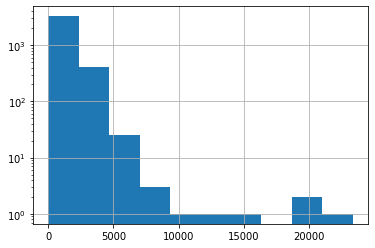

In [257]:
df_s.desc_en.str.len().hist()
plt.yscale('log')

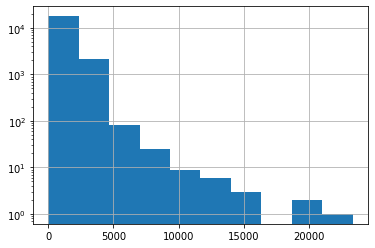

In [256]:
df_s_large.desc_en.str.len().hist()
plt.yscale('log')

In [248]:
df_s_large[df_s_large.desc_en.str.len() < 50].desc_en.values

array(['unfrozen sections.', '`', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'Yes but its two pages and includes a chart',
       'yes', 'yes', 'e', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes'

In [267]:
print(df_s.shape, df_s_large.shape)
for i in [500,1000,2000,3000,4000,5000,10000]:
    print(i,df_s[df_s.desc_en.str.len() <= i].shape, df_s_large[df_s_large.desc_en.str.len() <= i].shape)

(12316, 31) (92663, 31)
500 (375, 31) (2089, 31)
1000 (1483, 31) (7167, 31)
2000 (3052, 31) (16435, 31)
3000 (3506, 31) (19242, 31)
4000 (3649, 31) (19882, 31)
5000 (3675, 31) (19994, 31)
10000 (3701, 31) (20093, 31)


In [251]:
df_s_large[df_s_large.desc_en.str.len() > 10000].desc_en

1682     The report-area is underlain largely by the mo...
43261    The papers in this bulletin derive from presen...
49471    Adjacent to the south shore of Great Slave Lak...
66823    The study area (NTS 115 O, east ½ of 115 N, an...
67373    Rapid climate and environmental change has cre...
70038    The oldest rocks in the Maritimes belong to th...
70865    With the advances in geomatics technologies (i...
73740    Introduction \nGeneric exploration drilling st...
78102    This report was prepared further to Canada's c...
85705    Introduction: The Mesoproterozic Arctic Bay Fo...
86330    The Aquatic Effects Technology Evaluation (AET...
86331    Scope\nThe Aquatic Effects Technology Evaluati...
86342    BackgroundGuidelines and criteria levels for m...
86345    This study forms part of the Aquatic Effects T...
86356    The Mattabi Mine (Ontario) study is one of fou...
86357    The Dome Mine (Ontario) study is one of four f...
Name: desc_en, dtype: object

In [254]:
df_s_large[df_s_large.desc_en.str.len() > 10000].desc_en.iloc[0]

'The report-area is underlain largely by the more than 25,000 - foot - thick succession of Triassic and Lower Jurassic volcanic and sedimentary rocks of the Vancouver Group. The base of the group is not exposed . The Vancouver Group is subdivided into the  armutsen\nSubgroup below and the Bonanza Subgroup above ·with the Quatsino Limestone included in the latter. The broad Karnian (i.e. Karmutsen and early Quatsino time) marine basin, which exitended well to the west and east of the report-area, was transformed into a relatively narrow, north-trending\ndepositional trough in the early Norian and then fragmented by source areas (?islands) in the late Norian. The resulting complex facies pattern of elastic and calcareous sediments (Thinly bedded member, Arenaceous member, Sutton limestone) was terminated by the latest Triassic (?early Rhaetian)\norogenic phase which flexed the Triassic rocks and faulted them judging by the concurrent outburst of volcanism. The crests of at least two nort

In [263]:
df_s[(df_s.desc_en.str.len() >=1000) & (df_s.desc_en.str.len() < 1100)].desc_en.iloc[0]

'In October and November 1975 five recording magnetometers were set out in southeastern Ontario to study induction effects in the Grenville between Ottawa and Haliburton. Geological evidence suggests that an ancient <~ 1250 Ma) continental margin lies within this\nregion . Recordings of variations in X, y and z components were obtained at four stations which were compared with Ottawa magnetic observatory . Only small differences in amplitude of corresponding components were observed from one station to another, and major inhomogeneities in the electrical\nproperties of the crust therefore are not evident. While an electrical conductivity anomaly of significant magnitude was not found, there were differences at short periods in the magnetogram traces which are probably related to crustal structure. Geological and aeromagnetic maps of the region were\nexamined and revealed two large-scale magnetic signatures. These appear as two lineaments of anomalously high total magnetic intensity ext

In [264]:
df_s[(df_s.desc_en.str.len() >=2000) & (df_s.desc_en.str.len() < 2100)].desc_en.iloc[0]

'During the summer of 1979 well completion and pumping tests were conducted on the U of R Regina well, intended to be the water source well for the Geothermal Feasibility Project at Regina . The well is completed open hole in the Basal Clastic Unit below the casing shoe\nat 2034 m. A well head was installed, cernent plugs drilled out, a drill stem test was run over the entire open interval, cernent bond logs and directional survey were run, and three pump tests were conducted (45 minute trial and two-6 hour tests). Additionally a fracture program - ~n sit u stress\nmeasurement program was conducted by the University of Toronto. No sand was produced during the drill stem test or pump test and we anticipate that the open hale completion will be satisfactory. Based mainly on water level recovery after pump shutdown, the formation constants of the Basal Clastic\nUnit are assessed as: T (transmissivity) = 2.29 x 10-4 m2s-l (minimum value) S (storage coefficient)= 0.0036 (maximum value) With

In [265]:
df_s[(df_s.desc_en.str.len() >=3000) & (df_s.desc_en.str.len() < 3100)].desc_en.iloc[0]

'The Bouguer anomalies obtained on gravity traverses over the Canadian Shield in northern Ontario are separated into local and regional effects. The latter are evidently too extensive to be directly attributed to surface formations, and apparently result from conditions\ndeep within the crust. Two characteristic strike directions are exhibited by these regional trends, east-west and northeast-southwest, allowing them to be separated into two age groups. The first (cast-west striking) group of structures apparently dates from early Precambrian times, as it closely\nparallels folding and thrust faulting in the Timiskaming sediments, while the second (northeast-southwest striking) group is believed to result from tectonic activity of Huronian age.\nInterpretation of these anomalies has been based on the assumption of a layered crust, consisting of an upper, or granitic layer, underlain by a basaltic layer. It is shown that the majority of the regional anomalies cannot be explained by stru

In [268]:
len(df_s[(df_s.desc_en.str.len() >=3000) & (df_s.desc_en.str.len() < 3100)].desc_en.iloc[0].split())

471

In [269]:
len(df_s[(df_s.desc_en.str.len() >=4000) & (df_s.desc_en.str.len() < 4100)].desc_en.iloc[0].split())

635

In [266]:
df_s[(df_s.desc_en.str.len() >=4000) & (df_s.desc_en.str.len() < 4100)].desc_en.iloc[0]

'At its type section on Mount Kindle near Wrigleyin the southern Franklin Mountains, the Franklin Mountain Formation is more than 917 feet (280 m) thick. It includes varicoloured, thin to thick bedded dolomite and argillaceous dolomite, and represents shallow-marine and\nperitidal environments. The formation is widely distributed in the eastern Mackenzie Mountains and in the Franklin Mountains; in these areas, it appears to be less than 2,500feet (760 m) thick. In the Interior Plains, where the formation also is widespread, surface thicknesses appear to be less than\n2,500 feet (760 m); but more than 3,400 feet (1,035 m) of strata can be assigned to the Franklin Mountain in the subsurface of the Colville Hills area. Three informal unit scan be recognized widely within the Franklin Mountain Formation. From base to top these are: the cyclic unit (0-450 ft.; 0-137\nm), the rhythmic unit (?100-1,600 ft.; ?30-490 m), and the cherty unit(0-?2,400 ft.; 0-?730 m). Over the entire area of out c

**analysis** we also have french in the descriptions! maybe we should try to remove it

**analysis** 
* drop the desc <50 characters for sure 
* There are some really long abstracts (>10k, >20k) - they're legitimate text, but maybe too long 

In [270]:
import re
import string
punct = re.escape(string.punctuation)
vocab_small = df_s.desc_en.str.replace(f'[{punct}]', ' ').str.lower().str.split()
vocab_large = df_s_large.desc_en.str.replace(f'[{punct}]', ' ').str.lower().str.split()

<ipython-input-270-9af3e3ea2b4c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  vocab_small = df_s.desc_en.str.replace(f'[{punct}]', ' ').str.lower().str.split()
<ipython-input-270-9af3e3ea2b4c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  vocab_large = df_s_large.desc_en.str.replace(f'[{punct}]', ' ').str.lower().str.split()


In [271]:
vc_small = vocab_small.explode().value_counts()
vc_large = vocab_large.explode().value_counts()

In [272]:
vc_small

the             55547
of              35268
and             31570
in              17545
to              14466
                ...  
adhere              1
lithosphère         1
understating        1
leroy               1
tre                 1
Name: desc_en, Length: 30131, dtype: int64

In [273]:
vc_large

the              290666
of               184303
and              160661
in                95299
to                85334
                  ...  
gemmological          1
asynchroneity         1
broadlands            1
acessible             1
regelation            1
Name: desc_en, Length: 69015, dtype: int64

In [274]:
vc_small[vc_small > 2]

the               55547
of                35268
and               31570
in                17545
to                14466
                  ...  
spicular              3
foredunes             3
163                   3
sinwa                 3
semianthracite        3
Name: desc_en, Length: 13092, dtype: int64

In [275]:
vc_large[vc_large > 2]

the          290666
of           184303
and          160661
in            95299
to            85334
              ...  
2ê                3
homologue         3
amassed           3
coils             3
euglyphus         3
Name: desc_en, Length: 31187, dtype: int64

**analysis** The full dataset does have a significantly larger vocabulary than the small subset (somewhere between 2x and 3x)

In [280]:
import tqdm
from langdetect import detect as detect_lang
tqdm.tqdm.pandas() 

def str_lang_detect(x):
    if x is None:
        return None
    try:
        retval = detect_lang(x) 
    except Exception as e:
        #raise(e)
        print(e)
        retval = None
        
    return retval

df_s_large['desc_en_lang'] = df_s_large.desc_en.progress_apply(str_lang_detect)
df_s['desc_en_lang'] = df_s.desc_en.progress_apply(str_lang_detect)

 75%|███████▌  | 69679/92663 [01:07<00:14, 1561.56it/s] 

No features in text.


100%|██████████| 12316/12316 [00:31<00:00, 388.91it/s] 


In [281]:
df_s_large['desc_fr_lang'] = df_s_large.desc_fr.progress_apply(str_lang_detect)
df_s['desc_fr_lang'] = df_s.desc_fr.progress_apply(str_lang_detect)

 42%|████▏     | 38954/92663 [00:14<01:20, 668.29it/s]  

No features in text.


100%|██████████| 12316/12316 [00:19<00:00, 646.86it/s] 


In [283]:
df_s_large[df_s_large.desc_fr_lang == 'en'].desc_fr

773      This catalogue lists 564 earthquakes of magnit...
951      This catalogue lists 226 earthquakes of magnit...
1146     The construction, characteristics, and perform...
1361     This catalogue lists 238 earthquakes of magnit...
4375     This book deals with prospecting in Canada in ...
4828     The geoscientific information system for the N...
38381    The Bluenose Lake Moraine, a moraine with a gl...
38482    Geomorphological processes are related to clim...
40658    The poster and supporting documentation on sei...
74723    Ground deformation in the Cold Lake, Alberta, ...
79641    Alignments of fractures and cracks in marine s...
86275    The adsorption of C 14 -labelled oleic acid on...
86590    The present work forms part of a program to de...
Name: desc_fr, dtype: object

In [284]:
df_s_large['desc_en_en'] = df_s_large.progress_apply(lambda row: row.desc_en if row.desc_en_lang == 'en' else 
                                                     row.desc_fr if row.desc_fr_lang == 'en' else None, axis=1)
df_s['desc_en_en'] = df_s.progress_apply(lambda row: row.desc_en if row.desc_en_lang == 'en' else 
                                         row.desc_fr if row.desc_fr_lang == 'en' else None, axis=1)

100%|██████████| 12316/12316 [00:00<00:00, 38476.07it/s]


In [285]:
with pd.option_context('display.max_rows', 200):
    display(df_s_large[(df_s_large.desc_en_en != df_s_large.desc_en) & ~df_s_large.desc_en.isnull()].filter(regex='desc'))

,{http://purl.org/dc/elements/1.1/}description_en,{http://purl.org/dc/elements/1.1/}description_fr,desc_en,desc_fr,desc_en_lang,desc_fr_lang,desc_en_en
773,[Le présent catalogue énumère 564 tremblements...,[This catalogue lists 564 earthquakes of magni...,Le présent catalogue énumère 564 tremblements ...,This catalogue lists 564 earthquakes of magnit...,fr,en,This catalogue lists 564 earthquakes of magnit...
951,[Le présent catalogue énumère 226 tremblements...,[This catalogue lists 226 earthquakes of magni...,Le présent catalogue énumère 226 tremblements ...,This catalogue lists 226 earthquakes of magnit...,fr,en,This catalogue lists 226 earthquakes of magnit...
1146,"[Les auteurs décrivent la construction, les ca...","[The construction, characteristics, and perfor...","Les auteurs décrivent la construction, les car...","The construction, characteristics, and perform...",fr,en,"The construction, characteristics, and perform..."
1361,[Le présent catal ogue énumèr e 238 tremblemen...,[This catalogue lists 238 earthquakes of magni...,Le présent catal ogue énumèr e 238 tremblement...,This catalogue lists 238 earthquakes of magnit...,fr,en,This catalogue lists 238 earthquakes of magnit...
4375,[La présente étude vise à donner de la prospec...,[This book deals with prospecting in Canada in...,La présente étude vise à donner de la prospect...,This book deals with prospecting in Canada in ...,fr,en,This book deals with prospecting in Canada in ...
4828,[Le système d'information géoscientifique de l...,[The geoscientific information system for the ...,Le système d'information géoscientifique de la...,The geoscientific information system for the N...,fr,en,The geoscientific information system for the N...
38201,[The central Wabigoon region between the Sturg...,[None],The central Wabigoon region between the Sturge...,None,fr,None,None
38338,[Plusieurs riches assemblages de radiolaires b...,[Une séquence unique de roches sédimentaires f...,Plusieurs riches assemblages de radiolaires bi...,Une séquence unique de roches sédimentaires fo...,fr,fr,None
38381,"[Au sud du détroit du Dolphin et de l'Union, d...","[The Bluenose Lake Moraine, a moraine with a g...","Au sud du détroit du Dolphin et de l'Union, da...","The Bluenose Lake Moraine, a moraine with a gl...",fr,en,"The Bluenose Lake Moraine, a moraine with a gl..."
38496,[Des mesures de la résistivité électrique ont ...,[Les propriétés électriques d'échantillons de ...,Des mesures de la résistivité électrique ont é...,Les propriétés électriques d'échantillons de r...,fr,fr,None


In [287]:
df_s_large['desc_en_en_50_3000'] = df_s_large.desc_en_en.progress_apply(lambda x: x if x is not None and 50 < len(x) < 3000 else None)
df_s['desc_en_en_50_3000'] = df_s.desc_en_en.progress_apply(lambda x: x if x is not None and 50 < len(x) < 3000 else None)

100%|██████████| 12316/12316 [00:00<00:00, 746122.54it/s]


In [288]:
df_s_large['desc_en_en_50_3000'].str.len().describe()

count    19089.000000
mean      1287.984389
std        641.807829
min         52.000000
25%        805.000000
50%       1195.000000
75%       1719.000000
max       2999.000000
Name: desc_en_en_50_3000, dtype: float64

In [329]:
df_s_large[df_s_large['desc_en_en_50_3000'].str.len() <70].desc_en_en_50_3000.sample(1).iloc[0] #.describe()

'Solar flares are a burst of electromagnetic radiation from the Sun.'

## The Titles

In [330]:
display(df_s_large['{http://purl.org/dc/elements/1.1/}title_fr'].isnull().sum())
display(df_s_large['{http://purl.org/dc/elements/1.1/}title_en'].isnull().sum())
display(df_s_large['{http://purl.org/dc/elements/1.1/}title'].isnull().sum())
display(df_s_large.shape[0])

69854

4586

92499

92663

**analysis** almost all entries have english titles, but very few have "title" or "title_fr"

In [332]:
d = df_s_large[~df_s_large['{http://purl.org/dc/elements/1.1/}title'].isnull()].filter(regex='title')
display(d)
display(d[~d['{http://purl.org/dc/elements/1.1/}title_en'].isnull()])
display(d[~d['{http://purl.org/dc/elements/1.1/}title_fr'].isnull()])
display(d[d['{http://purl.org/dc/elements/1.1/}title_en'].isnull()])
display(d.describe())

,{http://purl.org/dc/elements/1.1/}title_en,{http://purl.org/dc/elements/1.1/}title_fr,{http://purl.org/dc/elements/1.1/}title
554,None,None,[Zur Stratigraphie Und Tektonik Der Soudoostli...
2044,None,None,[Application of the Huntec Deep Tow High - Res...
2045,None,None,[A Method For the Compilation of High Quality ...
2046,None,None,"[Distribution of Foraminifera in Chaleur Bay, ..."
2047,None,None,"[Seismic Instrument Tests in Kugmallit Bay, Di..."
...,...,...,...
90499,[Determination of glacier retreat at Nevado de...,None,[Estimación del retroceso glaciar en los volca...
91682,None,None,[The need for an absolute gravity apparatus in...
91724,None,None,[Shallow borehole temperature profiles in perm...
91939,None,None,[Grouting techniques used to decommission a fl...


,{http://purl.org/dc/elements/1.1/}title_en,{http://purl.org/dc/elements/1.1/}title_fr,{http://purl.org/dc/elements/1.1/}title
10717,[Ontario [31F/1b]],None,[Ontario [31F/1b]]
26478,[Circumpolar geological map of the Arctic],[Carte géologique circumpolaire de l'Arctique],[Tsirkumpoliarnaia Geologicheskaia Karte Arctiki]
32053,[Circumpolar map of Quaternary deposits of the...,[Carte circumpolaire des dépôts Quaternaires d...,[Tsirkumpoliarnaia Karta Chetvertichnykh Otloz...
34922,[The role of sea level change in the evolution...,None,[O rolos tés metabolée tés stathmès tés thalas...
34985,[Isotopic composition of South American meteor...,None,[Composicion isotopica de aguas meteoricas de ...
35159,"[Carboniferous conodonts, Wrangel Island]",None,[Kamennougol'nye konodonty ostrova Vrangelya]
36074,[Magnetic anomalies and tectonic elements of n...,None,[Magnitnye anomalii i tektonichkie elementy se...
36607,[Groundwater quality in drilled wells in mount...,None,[Grunnvannskvalitet i borebrønner i fjell fra ...
37078,[Intercontinental correlation of the Lower Dev...,None,[O mezhkontinental'noi korrelyatsii srednedevo...
37229,[Intersilite Na6MnTi[Si10O24(OH)](OH)3.4H2O - ...,None,[Intersilit Na6MnTi[Si10O24(OH)](OH)3.4H2O - n...


,{http://purl.org/dc/elements/1.1/}title_en,{http://purl.org/dc/elements/1.1/}title_fr,{http://purl.org/dc/elements/1.1/}title
26478,[Circumpolar geological map of the Arctic],[Carte géologique circumpolaire de l'Arctique],[Tsirkumpoliarnaia Geologicheskaia Karte Arctiki]
32053,[Circumpolar map of Quaternary deposits of the...,[Carte circumpolaire des dépôts Quaternaires d...,[Tsirkumpoliarnaia Karta Chetvertichnykh Otloz...
42147,[The North America tapestry of time and terrain],[L'Amérique de Nord: un collage de terrains d'...,[Cobertura de tiempo y terrenos de Norte América]
70130,[Watershed mapping and monitoring for northern...,[Cartographie et suivi des bassins versants po...,[Watershed mapping and monitoring for northern...
70131,[Watershed mapping and monitoring for northern...,[Cartographie et suivi des bassins versants po...,[Watershed mapping and monitoring for northern...
71179,[North American environmental atlas],[Atlas environnemental de l'Amérique du Nord],[Atlas ambiental de América del Norte]
72523,"[No title, Nunavut]","[No title, Nunavut]","[No title, Nunavut]"
73718,"[Iqaluit, Nunavut]","[Iqaluit, Nunavut]","[Iqaluit, Nunavut]"
80669,[An investigation of secondary hardening of a ...,[Étude du durcissement secondaire d'un acier a...,[Untbrsuchung der spkundt1rvbrrdstigung einbs ...
86395,[Canadian coal preparation plants],[Installations de préparation du charbon],"[Kanadische kohleaufbereitungsanlangen, Canadi..."


,{http://purl.org/dc/elements/1.1/}title_en,{http://purl.org/dc/elements/1.1/}title_fr,{http://purl.org/dc/elements/1.1/}title
554,None,None,[Zur Stratigraphie Und Tektonik Der Soudoostli...
2044,None,None,[Application of the Huntec Deep Tow High - Res...
2045,None,None,[A Method For the Compilation of High Quality ...
2046,None,None,"[Distribution of Foraminifera in Chaleur Bay, ..."
2047,None,None,"[Seismic Instrument Tests in Kugmallit Bay, Di..."
...,...,...,...
84131,None,None,[Bewirtschaftung für den Wald von morgen]
91682,None,None,[The need for an absolute gravity apparatus in...
91724,None,None,[Shallow borehole temperature profiles in perm...
91939,None,None,[Grouting techniques used to decommission a fl...


,{http://purl.org/dc/elements/1.1/}title_en,{http://purl.org/dc/elements/1.1/}title_fr,{http://purl.org/dc/elements/1.1/}title
count,34,10,164
unique,34,10,164
top,[North American environmental atlas],[Atlas environnemental de l'Amérique du Nord],"[Geology, McKeand River (north), Baffin Island..."
freq,1,1,1


**analysis** 
* If there is a title_en, it should supercede title and title_fr
* If there is *only* a title, we only want to keep it if it's in english

In [333]:
display(df_s_large['{http://purl.org/dc/elements/1.1/}title_fr'].str.len().describe())
display(df_s_large['{http://purl.org/dc/elements/1.1/}title_en'].str.len().describe())
display(df_s_large['{http://purl.org/dc/elements/1.1/}title'].str.len().describe())
display(df_s_large.shape[0])

count    22809.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: {http://purl.org/dc/elements/1.1/}title_fr, dtype: float64

count    88077.000000
mean         1.000216
std          0.014686
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: {http://purl.org/dc/elements/1.1/}title_en, dtype: float64

count    164.00000
mean       1.02439
std        0.15473
min        1.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        2.00000
Name: {http://purl.org/dc/elements/1.1/}title, dtype: float64

92663

In [334]:
import pandas as pd
with pd.option_context('display.max_colwidth', None):
    display(df_s_large[df_s_large['{http://purl.org/dc/elements/1.1/}title_en'].str.len() > 1].filter(regex='title'))
    display(df_s_large[df_s_large['{http://purl.org/dc/elements/1.1/}title'].str.len()>1].filter(regex='title'))

,{http://purl.org/dc/elements/1.1/}title_en,{http://purl.org/dc/elements/1.1/}title_fr,{http://purl.org/dc/elements/1.1/}title
10508,"[Abstracts of publications in scientific journals by officers of the Geological Survey of Canada, 1981, Résumés de publications par les chercheurs de la Commission géologique du Canada parues dans des revues scientifique, 1981]",None,None
10531,"[List of serials held in the Geological Survey of Canada Library: 1982, Répertoire des périodiques retenus dans la bibliothèque de la Commission Géologique Du Canada: 1982]",None,None
10812,"[Current research in the Geological Sciences in Canada May 1979-april 1980, Projets de recherche en cours d'execution au Canada - Sciences Geologiques Mai 1979-avril 1980]",None,None
17425,"[Abstracts of publications in scientific journals by officers of the Geological Survey of Canada, 1980, Résumés de publications par les chercheurs de la Commission Géologique du Canada parues dans des revues scientifiques, 1980]",None,None
19715,"[Rubidium-Strontium and Uranium-Lead Isotopic Age Studies, Etudes Des Datations Isotopiques Par Les Methodes Rubidium-Strontium Et Uranium-Plomb]",None,None
19717,"[Rubidium-strontium and Uranium-lead Isotopic Age Studies, Etudes Des Datations Isotopiques Par Les Methodes Rubidium-strontium Et Uranium-plomb]",None,None
19791,"[Rubidium-strontium and Uranium-lead Isotopic Age Studies, Etudes Des Datations Isotopiques Par Les Methodes Rubidium-strontium Et Uranium-plomb]",None,None
19963,"[Current activities forum 1984: program with abstracts, Forum des travaux en cours 1984: programme et résumés]",None,None
19995,"[Summary: quaternary stratigraphy of Canada, Sommaire: stratigraphie quaternaire]",None,None
19996,"[The Canadian work group of IGCP Project 24, quaternary glaciations in the northern hemisphere, Groupe de travail Canadien du Projet 24 PICG glaciations quaternaires de l'hemisphere nord]",None,None


,{http://purl.org/dc/elements/1.1/}title_en,{http://purl.org/dc/elements/1.1/}title_fr,{http://purl.org/dc/elements/1.1/}title
36074,[Magnetic anomalies and tectonic elements of northeast Eurasia],None,"[Magnitnye anomalii i tektonichkie elementy severo- voctochnoi Evrazii, Magnetic anomalies and tectonic elements of northeast Eurasia]"
49255,None,None,"[Material educativo para teledetección mediante radares, GlobeSAR-2, Recursos educacionais para sensoriamento remoto de radar, GlobeSAR-2]"
69553,None,None,"[Programa de comunidades forestales, ayudando a las comunidades a enfrentar los desafíos de la transición en un sector forestal en proceso de cambio, Programa de comunidades forestais, ajudamos comunidades a enfrentarem os desafios de um sector forestal em evolução]"
86395,[Canadian coal preparation plants],[Installations de préparation du charbon],"[Kanadische kohleaufbereitungsanlangen, Canadian coal preparation plants]"


**analysis** 
* there are some examples of title_en and title having two entries
* sometimes, this is a title-subtitle relationship
* sometimes, this is a title-en, title-otherlang situation
* we only want to keep the titles in a multi-title list if they are in english

In [335]:
from langdetect import detect as detect_lang
import tqdm 
tqdm.tqdm.pandas()
df_s_large['title_en_lang'] = df_s_large['{http://purl.org/dc/elements/1.1/}title_en'].progress_apply(lambda x: [detect_lang(xx) if xx is not None else xx for xx in x] if x is not None else x)

100%|██████████| 92663/92663 [13:13<00:00, 116.73it/s]


In [336]:
df_s_large['title_lang'] = df_s_large['{http://purl.org/dc/elements/1.1/}title'].progress_apply(lambda x: [detect_lang(xx) if xx is not None else xx for xx in x] if x is not None else x)

100%|██████████| 92663/92663 [00:01<00:00, 55877.16it/s]


In [337]:
df_s_large['title_fr_lang'] = df_s_large['{http://purl.org/dc/elements/1.1/}title_fr'].progress_apply(lambda x: [detect_lang(xx) if xx is not None else xx for xx in x] if x is not None else x)

100%|██████████| 92663/92663 [03:17<00:00, 468.69it/s] 


In [338]:
from langdetect import detect as detect_lang
import tqdm 
tqdm.tqdm.pandas()
df_s['title_en_lang'] = df_s['{http://purl.org/dc/elements/1.1/}title_en'].progress_apply(lambda x: [detect_lang(xx) if xx is not None else xx for xx in x] if x is not None else x)
df_s['title_lang'] = df_s['{http://purl.org/dc/elements/1.1/}title'].progress_apply(lambda x: [detect_lang(xx) if xx is not None else xx for xx in x] if x is not None else x)
df_s['title_fr_lang'] = df_s['{http://purl.org/dc/elements/1.1/}title_fr'].progress_apply(lambda x: [detect_lang(xx) if xx is not None else xx for xx in x] if x is not None else x)

100%|██████████| 12316/12316 [00:09<00:00, 1261.55it/s]


In [341]:
import tqdm
tqdm.tqdm.pandas()

def keep_only_en(row, col_with_text, col_with_lang):
    if row[col_with_text] is None:
        return None
    
    try:
        retval = [row[col_with_text][i] for i in range(len(row[col_with_text])) 
            if row[col_with_text][i] is not None and row[col_with_lang][i] == 'en']
    except Exception as e:
        print(row)
        raise(e)
        
    return retval

df_s_large['title_en_en'] = df_s_large.progress_apply(lambda row: keep_only_en(row, col_with_text='{http://purl.org/dc/elements/1.1/}title_en', col_with_lang='title_en_lang'), axis=1)
df_s_large['title_no_en'] = df_s_large.progress_apply(lambda row: keep_only_en(row, col_with_text='{http://purl.org/dc/elements/1.1/}title', col_with_lang='title_lang'), axis=1)
df_s_large['title_fr_en'] = df_s_large.progress_apply(lambda row: keep_only_en(row, col_with_text='{http://purl.org/dc/elements/1.1/}title_fr', col_with_lang='title_fr_lang'), axis=1)

100%|██████████| 92663/92663 [00:01<00:00, 58430.85it/s]


In [342]:

df_s['title_en_en'] = df_s.progress_apply(lambda row: keep_only_en(row, col_with_text='{http://purl.org/dc/elements/1.1/}title_en', col_with_lang='title_en_lang'), axis=1)
df_s['title_no_en'] = df_s.progress_apply(lambda row: keep_only_en(row, col_with_text='{http://purl.org/dc/elements/1.1/}title', col_with_lang='title_lang'), axis=1)
df_s['title_fr_en'] = df_s.progress_apply(lambda row: keep_only_en(row, col_with_text='{http://purl.org/dc/elements/1.1/}title_fr', col_with_lang='title_fr_lang'), axis=1)

100%|██████████| 12316/12316 [00:00<00:00, 52874.05it/s]


In [343]:
df_s_large['title_en_en']

0        [Voggite, a new hydrated Na-Zr hydroxide-phosp...
1        [The inversion of time-domain airborne electro...
2        [Lithosphere folds in the Eurekan orogen, Arct...
3                                                     None
4             [Archaean Geology; Dating Old Gold Deposits]
                               ...                        
92658    [Clumped isotope temperature calibration for c...
92659    [An Overview on Isotopic Divergences - Causes ...
92660             [Catalogue of Mines Branch Publications]
92661    [Catalogue of Mines Branch Publications, with ...
92662    [Development of shale gas prediction models fo...
Name: title_en_en, Length: 92663, dtype: object

In [344]:
df_s_large[~df_s_large['title_no_en'].isnull() & (df_s_large['title_no_en'].str.len()>0)].filter(regex='title')

,{http://purl.org/dc/elements/1.1/}title_en,{http://purl.org/dc/elements/1.1/}title_fr,{http://purl.org/dc/elements/1.1/}title,title_en_lang,title_lang,title_fr_lang,title_en_en,title_no_en,title_fr_en
2044,None,None,[Application of the Huntec Deep Tow High - Res...,None,[en],None,None,[Application of the Huntec Deep Tow High - Res...,None
2045,None,None,[A Method For the Compilation of High Quality ...,None,[en],None,None,[A Method For the Compilation of High Quality ...,None
2046,None,None,"[Distribution of Foraminifera in Chaleur Bay, ...",None,[en],None,None,"[Distribution of Foraminifera in Chaleur Bay, ...",None
2048,None,None,[In Situ Environmental Responses of Benthonic ...,None,[en],None,None,[In Situ Environmental Responses of Benthonic ...,None
2106,None,None,"[Studies of geophysical methods, 1928 and 1929]",None,[en],None,None,"[Studies of geophysical methods, 1928 and 1929]",None
...,...,...,...,...,...,...,...,...,...
80225,None,None,[Bylot Island ancient environments research],None,[en],None,None,[Bylot Island ancient environments research],None
86395,[Canadian coal preparation plants],[Installations de préparation du charbon],"[Kanadische kohleaufbereitungsanlangen, Canadi...",[en],"[de, en]",[fr],[Canadian coal preparation plants],[Canadian coal preparation plants],[]
91682,None,None,[The need for an absolute gravity apparatus in...,None,[en],None,None,[The need for an absolute gravity apparatus in...,None
91724,None,None,[Shallow borehole temperature profiles in perm...,None,[en],None,None,[Shallow borehole temperature profiles in perm...,None


In [345]:
df_s[~df_s['title_no_en'].isnull() & (df_s['title_no_en'].str.len()>0)].filter(regex='title')

,{http://purl.org/dc/elements/1.1/}title_en,{http://purl.org/dc/elements/1.1/}title_fr,{http://purl.org/dc/elements/1.1/}title,title_en_lang,title_lang,title_fr_lang,title_en_en,title_no_en,title_fr_en
8378,[Watershed mapping and monitoring for northern...,[Cartographie et suivi des bassins versants po...,[Watershed mapping and monitoring for northern...,[en],[en],[fr],[Watershed mapping and monitoring for northern...,[Watershed mapping and monitoring for northern...,[]
8379,[Watershed mapping and monitoring for northern...,[Cartographie et suivi des bassins versants po...,[Watershed mapping and monitoring for northern...,[en],[en],[fr],[Watershed mapping and monitoring for northern...,[Watershed mapping and monitoring for northern...,[]
11026,None,None,[Bylot Island ancient environments research],None,[en],None,None,[Bylot Island ancient environments research],None
12231,"[Underwater avalanches, Qikiqtarjuaq, Baffin I...",None,"[Underwater avalanches, Qikiqtarjuaq, Baffin I...",[en],[en],None,"[Underwater avalanches, Qikiqtarjuaq, Baffin I...","[Underwater avalanches, Qikiqtarjuaq, Baffin I...",None


All of the text in these columns should be english

In [346]:
def remove_duplicates_keep_order(row):
    retval = row.title_en_en if row.title_en_en is not None else [] + \
             row.title_no_en if row.title_no_en is not None else []
    retval_set = list(set(retval))
    
    retval_list = [item for item in retval if item in retval_set]
    return retval_list
    
df_s_large['title_merged'] = df_s_large.progress_apply(remove_duplicates_keep_order, axis=1)
df_s_large['title_merged'] = df_s_large['title_merged'].str[0]

100%|██████████| 92663/92663 [00:03<00:00, 30412.93it/s]


In [347]:
with pd.option_context('display.max_colwidth', None):
    display(df_s_large[df_s_large['title_merged'].str.len()>1].filter(regex='title_merged'))

,title_merged
0,"Voggite, a new hydrated Na-Zr hydroxide-phosphate-carbonate from the Francon Quarry, Montreal, Quebec"
1,The inversion of time-domain airborne electromagnetic data using the plate model
2,"Lithosphere folds in the Eurekan orogen, Arctic Canada?"
4,Archaean Geology; Dating Old Gold Deposits
5,"Rock-Eval/TOC data for ten southwest Alberta wells (townships 16 to 30, ranges 2 to 10W5)"
...,...
92658,Clumped isotope temperature calibration for calcite: Bridging theory and experimentation
92659,An Overview on Isotopic Divergences - Causes for instability of Tree-Ring Isotopes and Climate Correlations
92660,Catalogue of Mines Branch Publications
92661,"Catalogue of Mines Branch Publications, with alphabetical guide"


In [348]:
df_s['title_merged'] = df_s.progress_apply(remove_duplicates_keep_order, axis=1)
df_s['title_merged'] = df_s['title_merged'].str[0]

100%|██████████| 12316/12316 [00:00<00:00, 32649.91it/s]


In [349]:
with pd.option_context('display.max_colwidth', None):
    display(df_s[df_s['title_merged'].str.len()>1].filter(regex='title_merged'))

,title_merged
0,"Rock-Eval/TOC data for ten southwest Alberta wells (townships 16 to 30, ranges 2 to 10W5)"
1,Catalogue of types and figured specimens of fossil plants in Geological Survey of Canada collections [Megaplant Supplement 1963-1967]
2,Catalogue of types and figured specimens of fossil plants in the Geological Survey of Canada collections
3,Illustrated catalogue of the Mollusca (Gastropoda and Bivalvia) in the Atlantic Geoscience Centre Index Collection
4,Canadian earthquakes - 1979
...,...
12311,"Neoproterozoic-Cambrian stratigraphy of the Mackenzie Mountains, northwestern Canada, part I: Ediacaran measured sections and updated lithostratigraphy, NE Sekwi Mountain map area (NTS 105-P)"
12312,"Neoproterozoic-Cambrian stratigraphy of the Mackenzie Mountains, northwestern Canada, part II: archival stratigraphic data for the Backbone Ranges Formation and related units, Mackenzie Mountains, Northwest Territories, Canada (NTS 95-L and 105-P)"
12313,Analyzing spatial patterns of thermal alteration in the Stikine and Wrangell terranes of the Canadian Cordillera using the conodont color alteration index (CAI) to identify hot spots and cold spots
12314,Report on U-Pb geochronology results from legacy (1997-2005) samples from northern Saskatchewan


In [350]:
with pd.option_context('display.max_colwidth', None):
    display(df_s_large[df_s_large['title_merged'].str.len()>1].filter(regex='title_merged'))

,title_merged
0,"Voggite, a new hydrated Na-Zr hydroxide-phosphate-carbonate from the Francon Quarry, Montreal, Quebec"
1,The inversion of time-domain airborne electromagnetic data using the plate model
2,"Lithosphere folds in the Eurekan orogen, Arctic Canada?"
4,Archaean Geology; Dating Old Gold Deposits
5,"Rock-Eval/TOC data for ten southwest Alberta wells (townships 16 to 30, ranges 2 to 10W5)"
...,...
92658,Clumped isotope temperature calibration for calcite: Bridging theory and experimentation
92659,An Overview on Isotopic Divergences - Causes for instability of Tree-Ring Isotopes and Climate Correlations
92660,Catalogue of Mines Branch Publications
92661,"Catalogue of Mines Branch Publications, with alphabetical guide"


In [351]:
with pd.option_context('display.max_colwidth', None):
    display(df_s_large[df_s_large['title_merged'].str.len()>1].filter(regex='title_merged'))

,title_merged
0,"Voggite, a new hydrated Na-Zr hydroxide-phosphate-carbonate from the Francon Quarry, Montreal, Quebec"
1,The inversion of time-domain airborne electromagnetic data using the plate model
2,"Lithosphere folds in the Eurekan orogen, Arctic Canada?"
4,Archaean Geology; Dating Old Gold Deposits
5,"Rock-Eval/TOC data for ten southwest Alberta wells (townships 16 to 30, ranges 2 to 10W5)"
...,...
92658,Clumped isotope temperature calibration for calcite: Bridging theory and experimentation
92659,An Overview on Isotopic Divergences - Causes for instability of Tree-Ring Isotopes and Climate Correlations
92660,Catalogue of Mines Branch Publications
92661,"Catalogue of Mines Branch Publications, with alphabetical guide"


## The keyword categories

In [355]:
print(df_s.shape)
print(df_s_large.shape)

(12316, 42)
(92663, 42)


In [356]:
vc = df_s['{http://purl.org/dc/elements/1.1/}subject_en'].explode().value_counts()
vc

geophysics                                  2723
stratigraphy                                2254
Quaternary                                  2123
Precambrian                                 1917
structural geology                          1888
                                            ... 
Gillis Brook Pluton                            1
Nahlin Ultramafics                             1
Canadian Rock Physical Property Database       1
radiometric sensitivity                        1
Turcotte Lake Fault                            1
Name: {http://purl.org/dc/elements/1.1/}subject_en, Length: 21656, dtype: int64

In [357]:
vc_large = df_s_large['{http://purl.org/dc/elements/1.1/}subject_en'].explode().value_counts()
vc_large

geophysics                      23848
miscellaneous                   19377
topography                      18997
vegetation                      18748
toponymy                        18600
                                ...  
publically funded geoscience        1
well logs                           1
Snake Formation                     1
Collingwood strata                  1
Betsiamites                         1
Name: {http://purl.org/dc/elements/1.1/}subject_en, Length: 42037, dtype: int64

In [358]:
top_200_large = vc_large[vc_large>200]

In [359]:
top_200 = vc[vc>200]

In [360]:
s_intersection= set(top_200_large.index).intersection(top_200.index)
print(s_intersection)
print(len(s_intersection))

{'silts', 'earthquakes', 'geophysics', 'bathymetry', 'limestones', 'economic geology', 'siltstones', 'nickel geochemistry', 'Precambrian', 'lithology', 'Water resources', 'mineral potential', 'copper', 'sulphides', 'wells', 'fossil zones', 'glaciofluvial deposits', 'hydrocarbon potential', 'Mississippian', 'gravels', 'cores', 'sandstones', 'nickel', 'lead', 'tills', 'moraines', 'groundwater resources', 'fossil fuels', 'till geochemistry', 'fossil distribution', 'dykes', 'geophysical surveys', 'uranium geochemistry', 'environmental geology', 'lake sediment geochemistry', 'Archean', 'groundwater', 'geophysical interpretations', 'gabbros', 'fossil distribution, geographic', 'gold', 'gas', 'geochemical analyses', 'molybdenum geochemistry', 'gypsum', 'silver', 'analyses', 'Silurian', 'seismic reflection surveys', 'boreholes', 'assays', 'Jurassic', 'stratigraphic analyses', 'mineral occurrences', 'data collections', 'igneous rocks', 'paleontology', 'analytical methods', 'sediments', 'toponym

In [361]:
s_difference= set(top_200_large.index).difference(top_200.index)
print(s_difference)
print(len(s_difference))

{'drumlins', 'snow', 'railway networks', 'buildings', 'metamorphic facies', 'organic materials', 'international boundary lines', 'displacement', 'Banff Formation', 'shoreline changes', 'geographic information system', 'petrogenesis', 'pegmatites', 'depositional history', 'quartz', 'subduction zones', 'quartzites', 'ice movement', 'slope failures', 'deglaciation', 'basement geology', 'granulites', 'permeability', 'earthquake studies', 'structural trends', 'computer applications', 'computer mapping', 'Churchill Province', 'orthogneisses', 'anhydrite', 'radiometric dating', 'Isachsen Formation', 'temperature', 'coastal studies', 'structural controls', 'greywackes', 'uranium thorium ratios', 'mantle', 'Slave Province', 'textural analyses', 'rifting', 'molybdenum', 'ore mineral genesis', 'potassium argon dates', 'orogenies', 'orogenesis', 'seismic zones', 'meltwater channels', 'chromite', 'migmatites', 'rhyolites', 'glacial lakes', 'uranium lead dating', 'anomalies', 'Economics and Industry

In [362]:
top_200n_large = vc_large.iloc[0:170]

In [363]:
s_difference= set(top_200n_large.index).difference(top_200.index)
print(s_difference)
print(len(s_difference))

{'transport', 'railway networks', 'buildings', 'thorium', 'hydrography', 'sedimentation', 'glaciolacustrine deposits', 'landscape types', 'alluvial deposits', 'magnetic surveys', 'magnetic anomalies', 'tectonic interpretations', 'uranium thorium ratios', 'e m surveys', 'topography', 'uranium lead dates', 'sulphide deposits', 'basalts', 'landforms', 'foliation', 'topographical maps', 'glacial striations', 'metasedimentary rocks', 'organic deposits', 'eskers', 'glacial landforms', 'aeromagnetic surveys', 'total field magnetics', 'landform classification', 'magnetic surveys, airborne', 'uranium potassium ratios', 'vegetation', 'magnetic interpretations', 'shear zones', 'boundaries', 'road networks', 'gradiometer surveys', 'faults, thrust', 'thorium-potassium ratios', 'elevations', 'structural interpretations', 'potassium', 'mineral exploration'}
43


In [364]:
s_difference= set(top_200.index).difference(top_200n_large.index)
print(s_difference)
print(len(s_difference))

{'silts', 'nickel geochemistry', 'Water resources', 'mineral potential', 'fossil zones', 'Mississippian', 'cores', 'till geochemistry', 'fossil distribution', 'uranium geochemistry', 'lake sediment geochemistry', 'fossil distribution, geographic', 'molybdenum geochemistry', 'gypsum', 'assays', 'data collections', 'geological hazards', 'chemical analyses', 'trace element analyses', 'zinc geochemistry', 'seismology', 'palynology', 'educational geology', 'correlations', 'copper geochemistry', 'iron geochemistry', 'surface waters', 'erosion', 'artesian wells', 'geochemical surveys', 'water analyses', 'ice movement directions', 'mineral exploration statistics', 'water geochemistry', 'production', 'cobalt geochemistry', 'manganese geochemistry', 'petroleum resources', 'seismic profiles', 'arsenic geochemistry', 'governments', 'lead geochemistry', 'side-scan sonar'}
43


In [ ]:
**analysis**
there is not a complete overlap between the top 200 in the large and the small dataset. there's a difference of 43

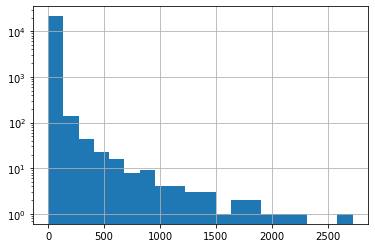

In [365]:
import matplotlib.pyplot as plt
vc.hist(bins=20)
plt.yscale('log')

<AxesSubplot:>

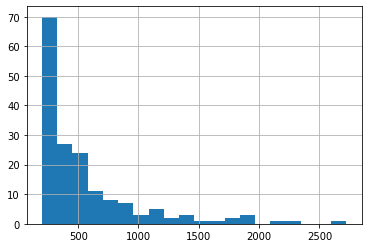

In [366]:
import matplotlib.pyplot as plt
vc[vc>200].hist(bins=20)
#plt.yscale('log')

In [367]:
vc[vc>200]

geophysics             2723
stratigraphy           2254
Quaternary             2123
Precambrian            1917
structural geology     1888
                       ... 
silts                   204
cores                   203
seismic profiles        202
educational geology     201
surface waters          201
Name: {http://purl.org/dc/elements/1.1/}subject_en, Length: 170, dtype: int64

In [368]:
vc.iloc[0:30]

geophysics                         2723
stratigraphy                       2254
Quaternary                         2123
Precambrian                        1917
structural geology                 1888
surficial geology/geomorphology    1874
economic geology                   1761
geochemistry                       1755
lithology                          1632
Cenozoic                           1485
regional geology                   1373
bedrock geology                    1369
Paleozoic                          1353
Cretaceous                         1332
fossil fuels                       1265
sedimentary rocks                  1197
paleontology                       1179
metallic minerals                  1117
Mesozoic                           1108
Phanerozoic                        1087
glacial deposits                   1054
geophysical surveys                1049
gold                                986
hydrogeology                        950
Devonian                            936


In [104]:
vc[vc>200].iloc[50:80]

sandstones                    572
aquifers                      571
stratigraphic analyses        569
stratigraphic correlations    567
volcanic rocks                566
groundwater resources         547
hydrocarbons                  540
depositional environment      529
shales                        527
mineralization                523
mining properties             505
uranium                       505
environmental geology         503
mineralogy                    499
seismic surveys               497
silver                        496
mineral occurrences           495
iron                          495
coal                          473
industrial minerals           470
Nature and Environment        464
earthquakes                   463
metamorphic rocks             457
intrusive rocks               451
biostratigraphy               450
nickel                        439
wells                         431
chemical analyses             417
Science and Technology        413
Archean       

**analysis**
It's hard to say if there's any meaningful difference between the very top and middle top sets of words

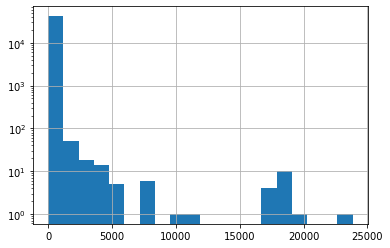

In [370]:
import matplotlib.pyplot as plt
vc_large.hist(bins=20)
plt.yscale('log')

In [371]:
vc_large.iloc[0:30]

geophysics                         23848
miscellaneous                      19377
topography                         18997
vegetation                         18748
toponymy                           18600
landforms                          18454
hydrography                        18213
boundaries                         17982
elevations                         17910
landscape types                    17909
buildings                          17889
road networks                      17887
landform classification            17884
railway networks                   17882
topographical maps                 17881
transport                          17869
magnetic surveys, airborne         11730
magnetic interpretations            9872
geophysical surveys                 8044
structural geology                  7848
Quaternary                          7626
surficial geology/geomorphology     7575
Precambrian                         7562
stratigraphy                        7278
lithology       

**analysis** 
* there is significant, but incomplete overlap in the most common categories in the small and large subsets
* it is probably worth producing three separate multi-class setups, 
   * small top >200, 
   * large top >200
   * large top (same number as top 200 from small)

In [372]:
df_s['subject_en_rank'] =  df_s['{http://purl.org/dc/elements/1.1/}subject_en'].apply(lambda x: [list(vc.index).index(xx) for xx in x if xx is not None] if x is not None else x)

In [373]:
df_s['subject_en_vc'] =  df_s['{http://purl.org/dc/elements/1.1/}subject_en'].progress_apply(lambda x: [vc[xx] for xx in x if xx is not None] if x is not None else x)

100%|██████████| 12316/12316 [00:00<00:00, 14010.07it/s]


In [374]:
df_ss = {}
for i in [1,2,5,10,50,100,200,300,400,500]:
    print(i)
    vc_t = vc[vc > i]
    df_s_t = df_s.copy()
    df_s_t['keeper_indices'] = df_s_t['{http://purl.org/dc/elements/1.1/}subject_en'].apply(lambda x: [i for i,xx in enumerate(x) if xx in vc_t.index] if x is not None else x)
    
    df_s_t['subject_en_vc'] = df_s_t.apply(lambda row: [xx for i,xx in enumerate(row.subject_en_vc) if i in row.keeper_indices] if row.subject_en_rank is not None else row.subject_en_rank, axis=1)
    
    df_s_t['subject_en_rank'] = df_s_t.apply(lambda row: [xx for i,xx in enumerate(row.subject_en_rank) if i in row.keeper_indices] if row.subject_en_rank is not None else row.subject_en_rank, axis=1)
    df_s_t['subject_en'] = df_s_t.apply(lambda row: [xx for i,xx in enumerate(row['{http://purl.org/dc/elements/1.1/}subject_en']) if i in row.keeper_indices] if row['{http://purl.org/dc/elements/1.1/}subject_en'] is not None else row['{http://purl.org/dc/elements/1.1/}subject_en'], axis=1)
    df_ss[i] = df_s_t
    

1
2
5
10
50
100
200
300
400
500


In [376]:
import numpy as np
df_sss = {}
for i,df_ss_t in df_ss.items():
    df_ss_t['n_subj'] = df_ss_t['subject_en'].str.len()
    df_ss_t['avg_rank'] = df_ss_t['subject_en_rank'].apply(lambda x: np.mean(x) if x is not None else x)
    df_ss_t['avg_std'] = df_ss_t['subject_en_rank'].apply(lambda x: np.std(x) if x is not None else x)
    df_ss_t['max_rank'] = df_ss_t['subject_en_rank'].apply(lambda x: np.max(x) if x is not None and x != [] else None)
    df_ss_t['min_rank'] = df_ss_t['subject_en_rank'].apply(lambda x: np.min(x) if x is not None and x != [] else None)
    df_ss_t['max_vc'] = df_ss_t['subject_en_vc'].apply(lambda x: np.max(x) if x is not None and x != [] else None)
    df_ss_t['min_vc'] = df_ss_t['subject_en_vc'].apply(lambda x: np.min(x) if x is not None and x != [] else None)
    
    df_sss[i] = df_ss_t

In [377]:
nulls = []
#df_sss[0].shape[0]-
for i, df_ss_t in df_sss.items():
    nulls.append((df_ss_t.n_subj.isnull() | (df_ss_t.n_subj == 0)).sum())

In [378]:
vc_len = []
for i, df_ss_t in df_sss.items():
    vc_len.append(df_ss_t.subject_en.explode().nunique())

In [379]:
avg_rank = []
max_rank = []
min_rank = []
for i, df_ss_t in df_sss.items():
    avg_rank.append(df_ss_t.avg_rank.mean())
    #.explode().nunique())

In [380]:
avg_rank

[795.6479388700612,
 640.0510333533798,
 479.20978909610693,
 366.8802518411771,
 162.68651070296977,
 97.22744350235885,
 55.31516623756923,
 40.715255354980414,
 30.93991872165323,
 24.110930486510288]

(12316, 53)
[108, 112, 114, 118, 156, 167, 215, 485, 848, 1147]
[9438, 6283, 3607, 2300, 684, 368, 170, 112, 81, 63]
     x  n_ex  n_subj
0    1   108    9438
1    2   112    6283
2    5   114    3607
3   10   118    2300
4   50   156     684
5  100   167     368
6  200   215     170
7  300   485     112
8  400   848      81
9  500  1147      63


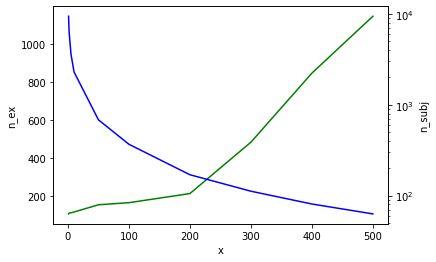

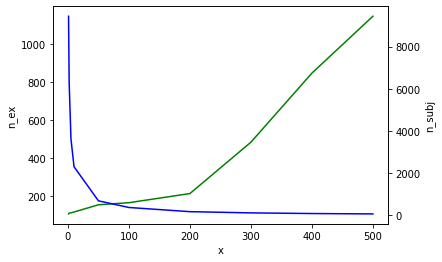

In [382]:
print(df_sss[1].shape)
import seaborn as sns
x = df_sss.keys()
y = nulls
print(y)
print(vc_len)
dplot = pd.DataFrame({'x': x, 'n_ex': y, 'n_subj': vc_len})
print(dplot)
sns.lineplot(data=dplot, x='x', y='n_ex', color='g')
ax2 = plt.twinx()
sns.lineplot(data=dplot, x='x', y='n_subj', color='b', ax=ax2)
ax2.set(yscale="log")
plt.show()#plodplot.plot.line()


sns.lineplot(data=dplot, x='x', y='n_ex', color='g')
ax2 = plt.twinx()
sns.lineplot(data=dplot, x='x', y='n_subj', color='b', ax=ax2)
#ax2.set(yscale="log")
plt.show()#plodplot.plot.line()

**analysis**
By eliminating subjects which appear <X times, 
while X<200, the line of the curve (number of examples we lose) is quite linear
while X >200, the line of the curve is much steeper (and still linear) so it seems like we're removing too many examples 
 at this point
    
By eliminating the subjects which appear <50 times, we see our greatest drop in subjects (this is the bottom of the elbow), we probably want to remove any that appear <50 times. 

We should either consider dropping <50 (-157 examples, 684 cat) vs <200 (-216 examples, 170 cat)

In [383]:
list(vc[vc>50].index)

['geophysics',
 'stratigraphy',
 'Quaternary',
 'Precambrian',
 'structural geology',
 'surficial geology/geomorphology',
 'economic geology',
 'geochemistry',
 'lithology',
 'Cenozoic',
 'regional geology',
 'bedrock geology',
 'Paleozoic',
 'Cretaceous',
 'fossil fuels',
 'sedimentary rocks',
 'paleontology',
 'metallic minerals',
 'Mesozoic',
 'Phanerozoic',
 'glacial deposits',
 'geophysical surveys',
 'gold',
 'hydrogeology',
 'Devonian',
 'copper',
 'structural features',
 'Ordovician',
 'igneous rocks',
 'sedimentology',
 'Tertiary',
 'marine geology',
 'fossil lists',
 'Jurassic',
 'mineral deposits',
 'toponymy',
 'geochronology',
 'geochemical analyses',
 'Proterozoic',
 'faults',
 'zinc',
 'Silurian',
 'igneous and metamorphic petrology',
 'Cambrian',
 'lead',
 'tills',
 'Carboniferous',
 'fossils',
 'tectonics',
 'Triassic',
 'sandstones',
 'aquifers',
 'stratigraphic analyses',
 'stratigraphic correlations',
 'volcanic rocks',
 'groundwater resources',
 'hydrocarbons',
 'd

In [384]:
list(vc[vc>200].index)

['geophysics',
 'stratigraphy',
 'Quaternary',
 'Precambrian',
 'structural geology',
 'surficial geology/geomorphology',
 'economic geology',
 'geochemistry',
 'lithology',
 'Cenozoic',
 'regional geology',
 'bedrock geology',
 'Paleozoic',
 'Cretaceous',
 'fossil fuels',
 'sedimentary rocks',
 'paleontology',
 'metallic minerals',
 'Mesozoic',
 'Phanerozoic',
 'glacial deposits',
 'geophysical surveys',
 'gold',
 'hydrogeology',
 'Devonian',
 'copper',
 'structural features',
 'Ordovician',
 'igneous rocks',
 'sedimentology',
 'Tertiary',
 'marine geology',
 'fossil lists',
 'Jurassic',
 'mineral deposits',
 'toponymy',
 'geochronology',
 'geochemical analyses',
 'Proterozoic',
 'faults',
 'zinc',
 'Silurian',
 'igneous and metamorphic petrology',
 'Cambrian',
 'lead',
 'tills',
 'Carboniferous',
 'fossils',
 'tectonics',
 'Triassic',
 'sandstones',
 'aquifers',
 'stratigraphic analyses',
 'stratigraphic correlations',
 'volcanic rocks',
 'groundwater resources',
 'hydrocarbons',
 'd

In [385]:
for n,value in zip(vc[vc>200], vc[vc>200].index):
    print(f"{value}|{n}")

geophysics|2723
stratigraphy|2254
Quaternary|2123
Precambrian|1917
structural geology|1888
surficial geology/geomorphology|1874
economic geology|1761
geochemistry|1755
lithology|1632
Cenozoic|1485
regional geology|1373
bedrock geology|1369
Paleozoic|1353
Cretaceous|1332
fossil fuels|1265
sedimentary rocks|1197
paleontology|1179
metallic minerals|1117
Mesozoic|1108
Phanerozoic|1087
glacial deposits|1054
geophysical surveys|1049
gold|986
hydrogeology|950
Devonian|936
copper|923
structural features|911
Ordovician|893
igneous rocks|878
sedimentology|849
Tertiary|826
marine geology|819
fossil lists|754
Jurassic|741
mineral deposits|731
toponymy|712
geochronology|707
geochemical analyses|706
Proterozoic|692
faults|691
zinc|665
Silurian|664
igneous and metamorphic petrology|664
Cambrian|663
lead|657
tills|653
Carboniferous|625
fossils|619
tectonics|614
Triassic|577
sandstones|572
aquifers|571
stratigraphic analyses|569
stratigraphic correlations|567
volcanic rocks|566
groundwater resources|54

In [386]:
len(set([x.lower() for x in list(vc[vc>200].index)]))

170

In [387]:
import re
vc_200 = list(vc[vc>200].index)
vv = [re.sub(f'[,/]',' ', x).split() for x in vc_200]
vv = [vvv for v in vv for vvv in v]
len(vv)

262

In [388]:
set_a = set([x for x in vv])
len(set_a)

186

In [389]:
set_b = set([x.lower() for x in vv])
len(set_b)

184

In [390]:
diff_list = set_a.difference(set_b)

In [391]:
for x in diff_list:
    if x in set_a and x.lower() in set_a:
        print(x)
        

Environment
Water


In [392]:
dd = pd.DataFrame({'x': [x.lower() for x in vv]}).value_counts()
for n,value in zip(dd,dd.index):
    print(f"{value[0]}|{n}")

geochemistry|14
geology|11
analyses|6
rocks|6
fossil|5
mineral|4
and|4
seismic|4
surveys|4
water|3
resources|3
deposits|3
glacial|3
environment|2
features|2
geochemical|2
potential|2
geophysical|2
groundwater|2
igneous|2
nickel|2
interpretations|2
iron|2
lead|2
minerals|2
distribution|2
metamorphic|2
uranium|2
correlations|2
copper|2
stratigraphic|2
wells|2
structural|2
zinc|2
petrology|1
phanerozoic|1
petroleum|1
permian|1
trace|1
permafrost|1
plutonic|1
palynology|1
paleozoic|1
paleontology|1
ordovician|1
oil|1
occurrences|1
toponymy|1
tills|1
statistics|1
triassic|1
nature|1
precambrian|1
movement|1
moraines|1
molybdenum|1
volcanic|1
modelling|1
waters|1
mississippian|1
miscellaneous|1
mining|1
mineralogy|1
mineralization|1
methods|1
till|1
tectonics|1
tertiary|1
sensing|1
sediment|1
sedimentary|1
stratigraphy|1
sedimentology|1
sediments|1
seismology|1
setting|1
sandstones|1
shales|1
side-scan|1
silts|1
siltstones|1
silurian|1
silver|1
science|1
sands|1
production|1
technology|1
son

In [393]:
set([x.lower() for x in vv])

{'alteration',
 'analyses',
 'analytical',
 'and',
 'aquifers',
 'archean',
 'arsenic',
 'artesian',
 'assays',
 'bathymetry',
 'bedrock',
 'biostratigraphy',
 'boreholes',
 'cambrian',
 'carboniferous',
 'cenozoic',
 'chemical',
 'clays',
 'climate',
 'coal',
 'cobalt',
 'collections',
 'computational',
 'conglomerates',
 'copper',
 'cores',
 'correlations',
 'cretaceous',
 'data',
 'dates',
 'deformation',
 'depositional',
 'deposits',
 'devonian',
 'diorites',
 'directions',
 'distribution',
 'dykes',
 'earthquakes',
 'economic',
 'educational',
 'element',
 'engineering',
 'environment',
 'environmental',
 'erosion',
 'exploration',
 'faults',
 'features',
 'field',
 'folds',
 'fossil',
 'fossils',
 'fuels',
 'gabbros',
 'gas',
 'general',
 'geochemical',
 'geochemistry',
 'geochronology',
 'geographic',
 'geological',
 'geology',
 'geomorphology',
 'geophysical',
 'geophysics',
 'glacial',
 'glaciation',
 'glaciofluvial',
 'gneisses',
 'gold',
 'governments',
 'granites',
 'gravel

1


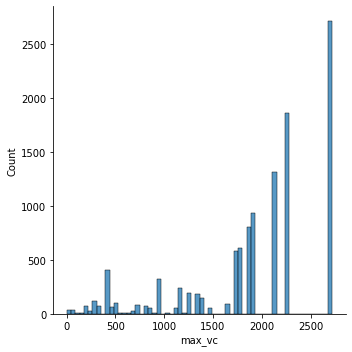

2


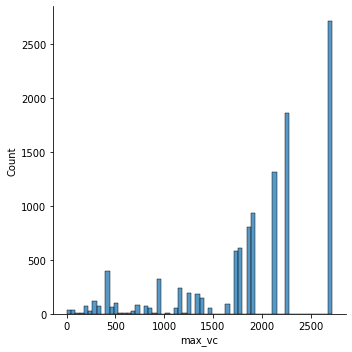

5


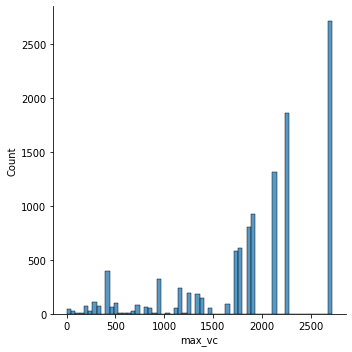

10


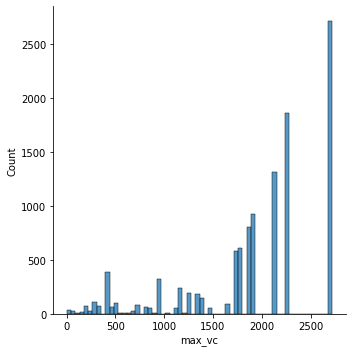

50


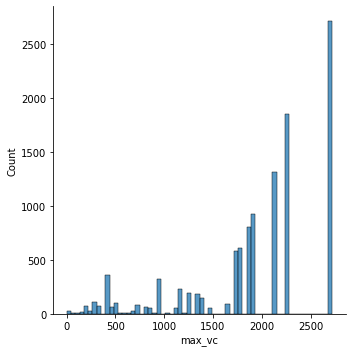

100


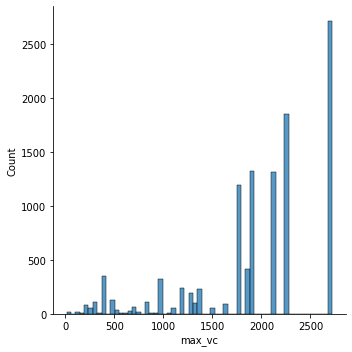

200


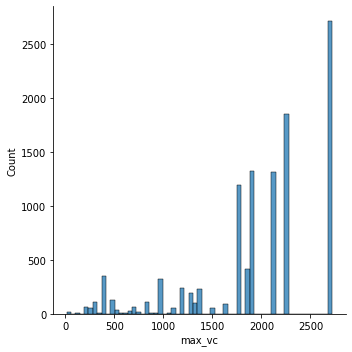

300


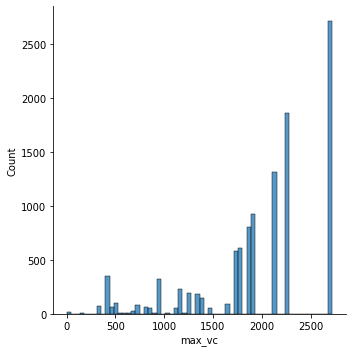

400


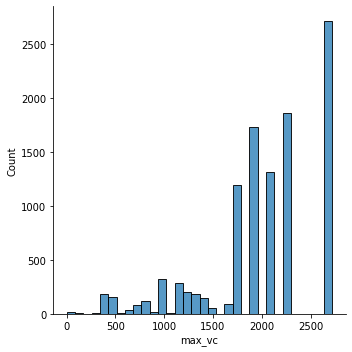

500


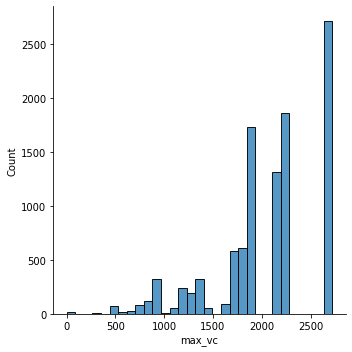

In [394]:
for i, df_ss_t in df_sss.items():
    print(i)
    sns.displot(df_ss_t, x='max_vc')
    plt.show()

1


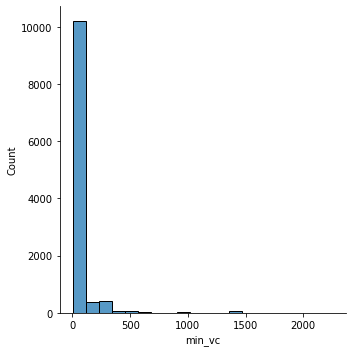

2


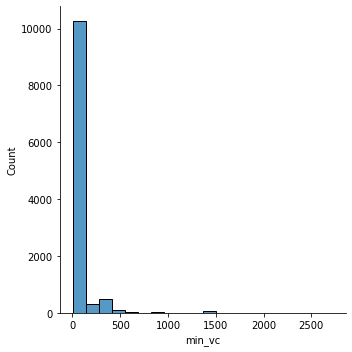

5


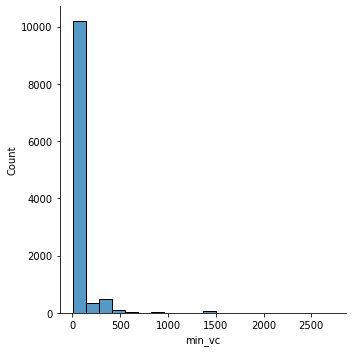

10


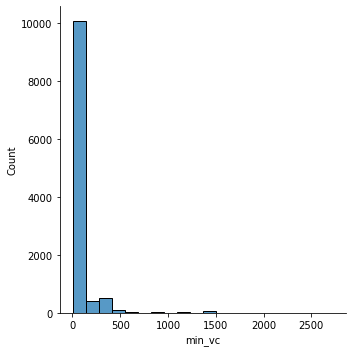

50


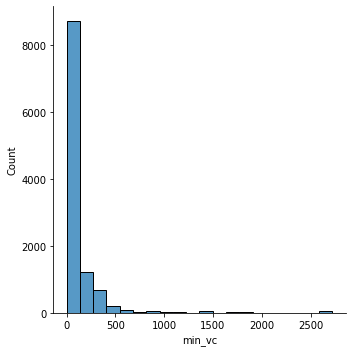

100


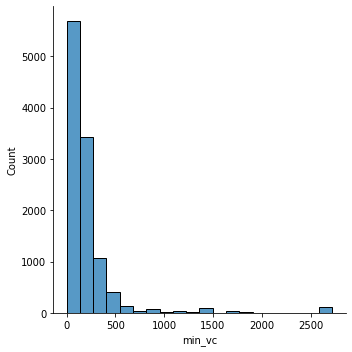

200


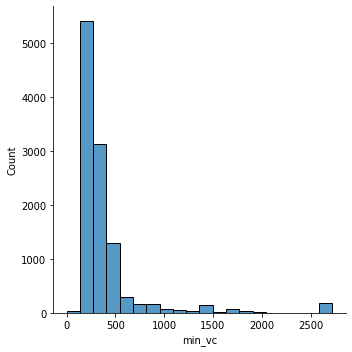

300


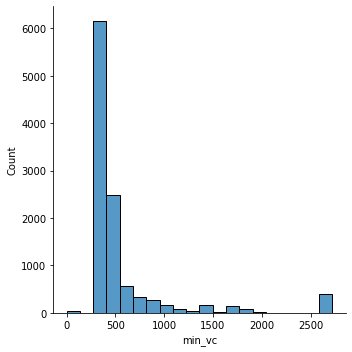

400


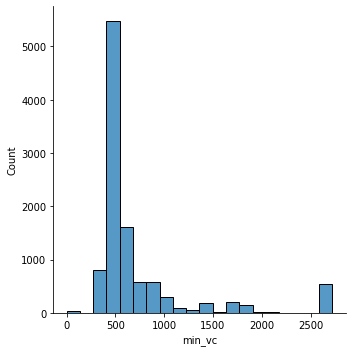

500


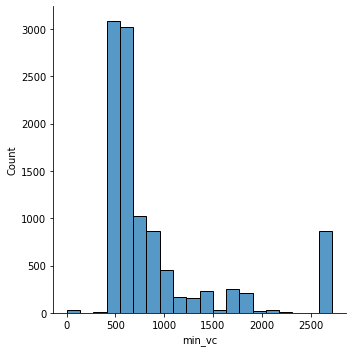

In [395]:
for i, df_ss_t in df_sss.items():
    print(i)
    sns.displot(df_ss_t, x='min_vc', bins=20)
    #plt.yscale('log')
    plt.show()

1


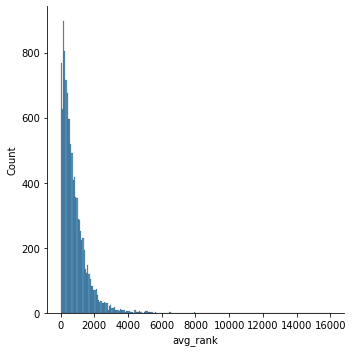

2


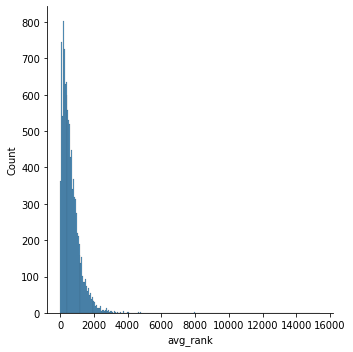

5


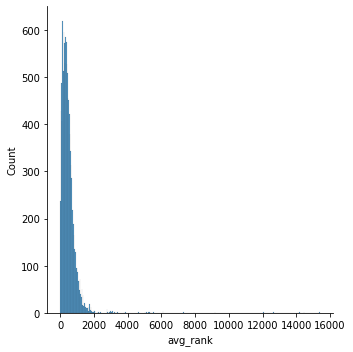

10


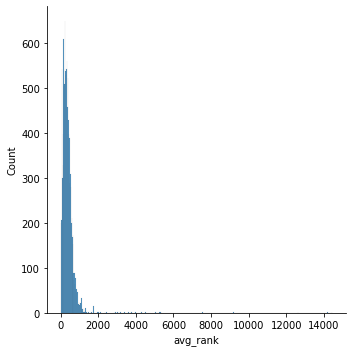

50


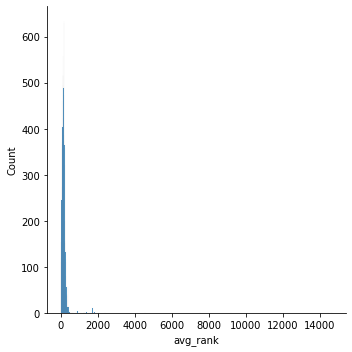

100


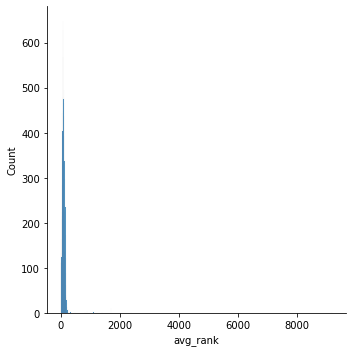

200


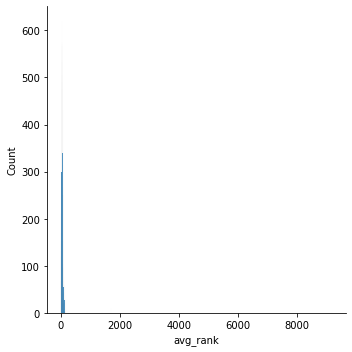

300


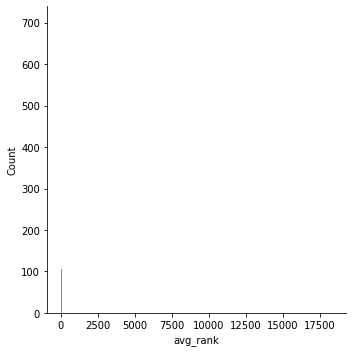

400


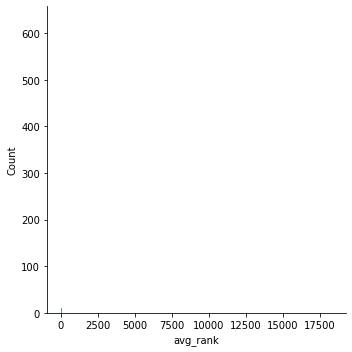

500


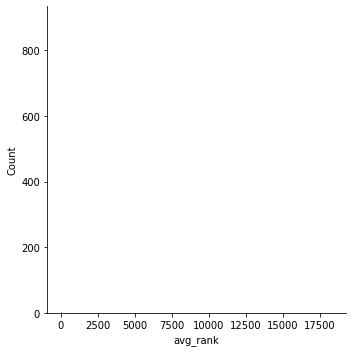

In [396]:
for i, df_ss_t in df_sss.items():
    print(i)
    sns.displot(df_ss_t, x='avg_rank')
    plt.show()

1


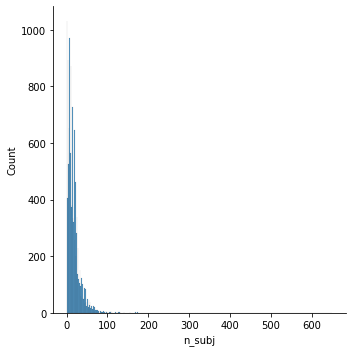

2


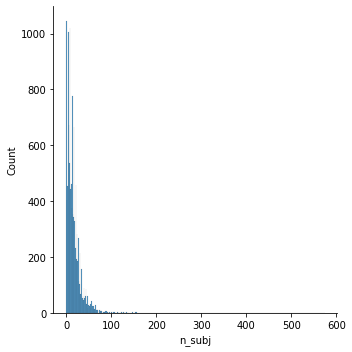

5


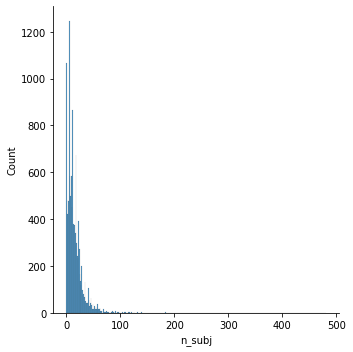

10


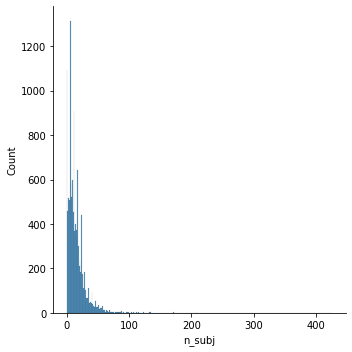

50


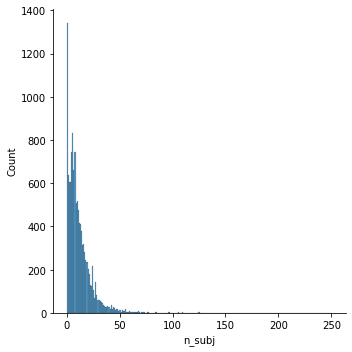

100


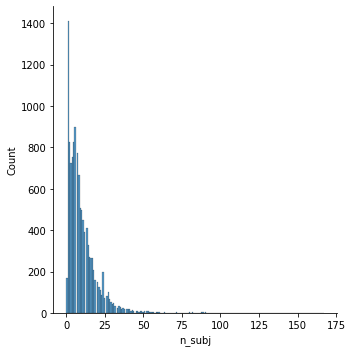

200


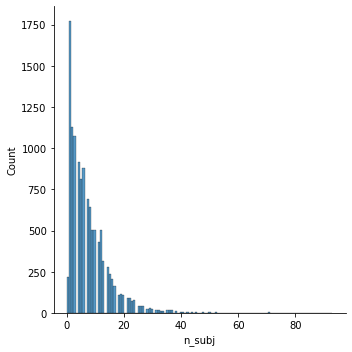

300


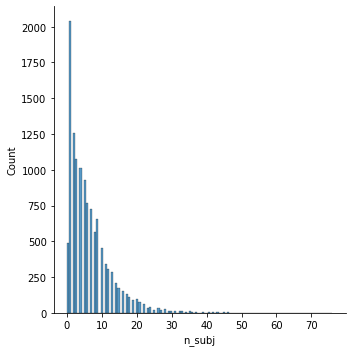

400


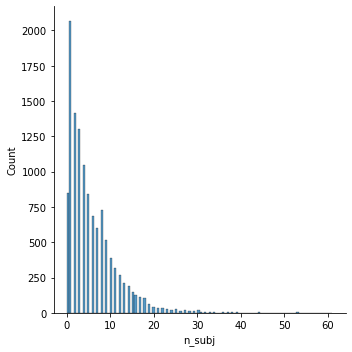

500


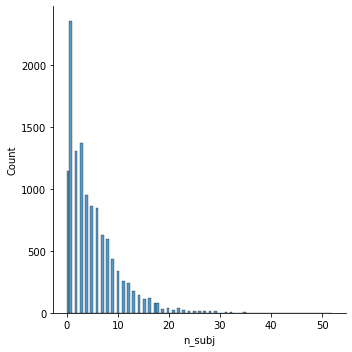

In [397]:
for i, df_ss_t in df_sss.items():
    print(i)
    sns.displot(df_ss_t, x='n_subj')
    plt.show()

In [400]:
vc_large = df_s_large['{http://purl.org/dc/elements/1.1/}subject_en'].explode().value_counts()
vc_small = df_s['{http://purl.org/dc/elements/1.1/}subject_en'].explode().value_counts()
vc_large_g200 = vc_large[vc_large>200]
vc_small_g200 = vc_small[vc_small>200]
vc_large_ns200 = vc_large.iloc[0:vc_small_g200.shape[0]]
vc_large_5 = vc_large.iloc[0:5]
vc_small_5 = vc_small.iloc[0:5]
vc_small_30 = vc_small.iloc[0:30]
vc_large_30 = vc_large.iloc[0:30]

In [401]:
import tqdm 
tqdm.tqdm.pandas()
df_s_large['subject_g200'] = df_s_large['{http://purl.org/dc/elements/1.1/}subject_en'].progress_apply(lambda x: [xx for xx in x if xx in vc_large_g200.index])
df_s['subject_g200'] = df_s['{http://purl.org/dc/elements/1.1/}subject_en'].progress_apply(lambda x: [xx for xx in x if xx in vc_small_g200.index])
df_s_large['subject_ns200'] = df_s_large['{http://purl.org/dc/elements/1.1/}subject_en'].progress_apply(lambda x: [xx for xx in x if xx in vc_large_ns200.index])

100%|██████████| 92663/92663 [00:00<00:00, 97951.09it/s] 


In [402]:
df_s['subject_5'] = df_s['{http://purl.org/dc/elements/1.1/}subject_en'].progress_apply(lambda x: [xx for xx in x if xx in vc_small_5.index])
df_s_large['subject_5'] = df_s_large['{http://purl.org/dc/elements/1.1/}subject_en'].progress_apply(lambda x: [xx for xx in x if xx in vc_large_5.index])

100%|██████████| 92663/92663 [00:01<00:00, 85247.36it/s] 


In [403]:
#df_s_large['subject_g200'] = df_s_large['{http://purl.org/dc/elements/1.1/}subject_en'].progress_apply(lambda x: [xx for xx in x if xx in vc_large_g200.index])
df_s['subject_30'] = df_s['{http://purl.org/dc/elements/1.1/}subject_en'].progress_apply(lambda x: [xx for xx in x if xx in vc_small_30.index])
df_s_large['subject_30'] = df_s_large['{http://purl.org/dc/elements/1.1/}subject_en'].progress_apply(lambda x: [xx for xx in x if xx in vc_large_30.index])

100%|██████████| 92663/92663 [00:00<00:00, 97177.97it/s] 


In [404]:
def replace_empty_list_with_none(x):
    if x is None:
        return None
    if len(x) == 0:
        return None
    return x
df_s_large['subject_g200'] = df_s_large['subject_g200'].progress_apply(replace_empty_list_with_none)
df_s_large['subject_ns200'] = df_s_large['subject_ns200'].progress_apply(replace_empty_list_with_none)
df_s['subject_g200'] = df_s['subject_g200'].progress_apply(replace_empty_list_with_none)

100%|██████████| 12316/12316 [00:00<00:00, 805480.07it/s]


In [405]:
df_s['subject_5'] =df_s['subject_5'].progress_apply(replace_empty_list_with_none)
df_s_large['subject_5'] = df_s_large['subject_5'].progress_apply(replace_empty_list_with_none)
df_s['subject_30'] =df_s['subject_30'].progress_apply(replace_empty_list_with_none)
df_s_large['subject_30'] = df_s_large['subject_30'].progress_apply(replace_empty_list_with_none)

100%|██████████| 92663/92663 [00:00<00:00, 800336.05it/s]


In [406]:
df_s_large.subject_g200

0        [carbonates, intrusive rocks, igneous rocks, m...
1        [geophysical surveys, geophysical interpretati...
2        [orogenies, structural features, folds, anticl...
3        [structural analyses, structural interpretatio...
4        [gold, mineral deposits, radiometric dates, ur...
                               ...                        
92658                                                 None
92659                                                 None
92660                                                 None
92661                                                 None
92662    [petroleum resources, hydrocarbons, gas, model...
Name: subject_g200, Length: 92663, dtype: object

## Title and description column

In [418]:
df_s['title_desc'] = (df_s['title_merged'].fillna('') + ' ' + df_s['desc_en_en_50_3000'].fillna('')).str.strip()
df_s['title_desc'] = df_s.title_desc.apply(lambda x: None if x == '' else x)
df_s['title_desc']

0        Rock-Eval/TOC data for ten southwest Alberta w...
1        Catalogue of types and figured specimens of fo...
2        Catalogue of types and figured specimens of fo...
3        Illustrated catalogue of the Mollusca (Gastrop...
4        Canadian earthquakes - 1979 This catalogue lis...
                               ...                        
12311    Neoproterozoic-Cambrian stratigraphy of the Ma...
12312    Neoproterozoic-Cambrian stratigraphy of the Ma...
12313    Analyzing spatial patterns of thermal alterati...
12314    Report on U-Pb geochronology results from lega...
12315    Sixth Generation Seismic Hazard Model of Canad...
Name: title_desc, Length: 12316, dtype: object

In [420]:
df_s_large['title_desc'] = (df_s_large['title_merged'].fillna('') + ' ' + df_s_large['desc_en_en_50_3000'].fillna('')).str.strip()
df_s_large['title_desc'] = df_s_large.title_desc.apply(lambda x: None if x == '' else x)
df_s_large['title_desc']

0        Voggite, a new hydrated Na-Zr hydroxide-phosph...
1        The inversion of time-domain airborne electrom...
2        Lithosphere folds in the Eurekan orogen, Arcti...
3                                                     None
4               Archaean Geology; Dating Old Gold Deposits
                               ...                        
92658    Clumped isotope temperature calibration for ca...
92659    An Overview on Isotopic Divergences - Causes f...
92660               Catalogue of Mines Branch Publications
92661    Catalogue of Mines Branch Publications, with a...
92662    Development of shale gas prediction models for...
Name: title_desc, Length: 92663, dtype: object

In [416]:
df_s[df_s.title_merged.str.len() < 20].title_merged

237      The Deep Bay crater
352         The Brent Crater
836      Banff area, Alberta
1021       Nahatlatch region
1224        Canmore, Alberta
                ...         
11596     Orbit of Boss 3323
11680     Orbit of Boss 1082
11760    The Cepheid problem
11765      The Castor System
11916           Astrophysics
Name: title_merged, Length: 101, dtype: object

## How big would the datasets be?

In [424]:
print(df_s[~df_s.title_merged.isnull()].shape)
print(df_s[~df_s.desc_en_en_50_3000.isnull()].shape)
print(df_s[~df_s.title_desc.isnull()].shape)

(11043, 48)
(3500, 48)
(11200, 48)


In [425]:
print(df_s_large[~df_s_large.title_merged.isnull()].shape)
print(df_s_large[~df_s_large.desc_en_en_50_3000.isnull()].shape)
print(df_s_large[~df_s_large.title_desc.isnull()].shape)

(75238, 47)
(19089, 47)
(76433, 47)


In [442]:
cats = {}
for df_name in ['small','large']:
    print('---------')
    print(df_name)
    if df_name == 'small':
        df = df_s
        cols = ['subject_5', 'subject_30',]# 'subject_g200']
    else:
        df = df_s_large
        cols = ['subject_30','subject_5', ]# 'subject_g200', 'subject_ns200']
        
    for textcol in ['title_merged', 'desc_en_en_50_3000', 'title_desc']:
        d = []
        for column in cols:
            df = df[~df[textcol].isnull()]
            x = df[column].explode().value_counts()
            cats[(df_name,textcol,column,'all')] = list(x.index)
            if len(x.index) > 10:
                cats[(df_name,textcol,column,'10')] = list(x.index[0:10])
            if len(x.index) > 5:
                cats[(df_name,textcol,column,'5')] = list(x.index[0:5])                
            
            x = pd.concat([x,x/df.shape[0]], axis=1)
            x.columns = pd.MultiIndex.from_product([x.columns, [textcol]])
            d.append(x)
            
        display(pd.concat(d, axis=1))
        
cats

---------
small


subject_5                subject_30  \
                                title_merged title_merged title_merged   
geophysics                            2543.0     0.230282         2543   
stratigraphy                          2086.0     0.188898         2086   
Quaternary                            1961.0     0.177579         1961   
Precambrian                           1699.0     0.153853         1699   
structural geology                    1688.0     0.152857         1688   
surficial geology/geomorphology          NaN          NaN         1715   
geochemistry                             NaN          NaN         1660   
lithology                                NaN          NaN         1541   
economic geology                         NaN          NaN         1500   
Cenozoic                                 NaN          NaN         1388   
Cretaceous                               NaN          NaN         1257   
Paleozoic                                NaN          NaN         1226   
regional geology                         NaN          NaN         1219   
bedrock geology                          NaN          NaN         1193   
fossil fuels                             NaN          NaN         1136   
sedimentary rocks                        NaN          NaN         1119   
paleontology                             NaN          NaN         1110   
Mesozoic                                 NaN          NaN         1034   
Phanerozoic                              NaN          NaN          985   
geophysical surveys                      NaN          NaN          983   
glacial deposits                         NaN          NaN          958   
metallic minerals                        NaN          NaN          943   
hydrogeology                             NaN          NaN          878   
gold                                     NaN          NaN          876   
Devonian                                 NaN          NaN          864   
structural features                      NaN          NaN          850   
sedimentology                            NaN          NaN          814   
igneous rocks                            NaN          NaN          809   
Ordovician                               NaN          NaN          805   
copper                                   NaN          NaN          792   

                                              
                                title_merged  
geophysics                          0.230282  
stratigraphy                        0.188898  
Quaternary                          0.177579  
Precambrian                         0.153853  
structural geology                  0.152857  
surficial geology/geomorphology     0.155302  
geochemistry                        0.150321  
lithology                           0.139545  
economic geology                    0.135833  
Cenozoic                            0.125690  
Cretaceous                          0.113828  
Paleozoic                           0.111021  
regional geology                    0.110387  
bedrock geology                     0.108032  
fossil fuels                        0.102871  
sedimentary rocks                   0.101331  
paleontology                        0.100516  
Mesozoic                            0.093634  
Phanerozoic                         0.089197  
geophysical surveys                 0.089016  
glacial deposits                    0.086752  
metallic minerals                   0.085393  
hydrogeology                        0.079507  
gold                                0.079326  
Devonian                            0.078240  
structural features                 0.076972  
sedimentology                       0.073712  
igneous rocks                       0.073259  
Ordovician                          0.072897  
copper                              0.071720

subject_5                     \
                                desc_en_en_50_3000 desc_en_en_50_3000   
geophysics                                   965.0           0.288663   
stratigraphy                                 806.0           0.241101   
Quaternary                                   639.0           0.191146   
Precambrian                                  583.0           0.174394   
structural geology                           558.0           0.166916   
surficial geology/geomorphology                NaN                NaN   
geochemistry                                   NaN                NaN   
lithology                                      NaN                NaN   
Cenozoic                                       NaN                NaN   
Paleozoic                                      NaN                NaN   
sedimentary rocks                              NaN                NaN   
economic geology                               NaN                NaN   
paleontology                                   NaN                NaN   
bedrock geology                                NaN                NaN   
structural features                            NaN                NaN   
Mesozoic                                       NaN                NaN   
Phanerozoic                                    NaN                NaN   
Cretaceous                                     NaN                NaN   
glacial deposits                               NaN                NaN   
fossil fuels                                   NaN                NaN   
igneous rocks                                  NaN                NaN   
regional geology                               NaN                NaN   
sedimentology                                  NaN                NaN   
Devonian                                       NaN                NaN   
geophysical surveys                            NaN                NaN   
Ordovician                                     NaN                NaN   
gold                                           NaN                NaN   
copper                                         NaN                NaN   
metallic minerals                              NaN                NaN   
hydrogeology                                   NaN                NaN   

                                        subject_30                     
                                desc_en_en_50_3000 desc_en_en_50_3000  
geophysics                                     965           0.288663  
stratigraphy                                   806           0.241101  
Quaternary                                     639           0.191146  
Precambrian                                    583           0.174394  
structural geology                             558           0.166916  
surficial geology/geomorphology                624           0.186659  
geochemistry                                   575           0.172001  
lithology                                      566           0.169309  
Cenozoic                                       491           0.146874  
Paleozoic                                      454           0.135806  
sedimentary rocks                              438           0.131020  
economic geology                               420           0.125636  
paleontology                                   381           0.113969  
bedrock geology                                373           0.111576  
structural features                            366           0.109483  
Mesozoic                                       348           0.104098  
Phanerozoic                                    342           0.102303  
Cretaceous                                     337           0.100808  
glacial deposits                               333           0.099611  
fossil fuels                                   331           0.099013  
igneous rocks                                  326           0.097517  
regional geology                               3

subject_5            subject_30           
                                title_desc title_desc title_desc title_desc
geophysics                           965.0   0.288663        965   0.288663
stratigraphy                         806.0   0.241101        806   0.241101
Quaternary                           639.0   0.191146        639   0.191146
Precambrian                          583.0   0.174394        583   0.174394
structural geology                   558.0   0.166916        558   0.166916
surficial geology/geomorphology        NaN        NaN        624   0.186659
geochemistry                           NaN        NaN        575   0.172001
lithology                              NaN        NaN        566   0.169309
Cenozoic                               NaN        NaN        491   0.146874
Paleozoic                              NaN        NaN        454   0.135806
sedimentary rocks                      NaN        NaN        438   0.131020
economic geology                       NaN        NaN        420   0.125636
paleontology                           NaN        NaN        381   0.113969
bedrock geology                        NaN        NaN        373   0.111576
structural features                    NaN        NaN        366   0.109483
Mesozoic                               NaN        NaN        348   0.104098
Phanerozoic                            NaN        NaN        342   0.102303
Cretaceous                             NaN        NaN        337   0.100808
glacial deposits                       NaN        NaN        333   0.099611
fossil fuels                           NaN        NaN        331   0.099013
igneous rocks                          NaN        NaN        326   0.097517
regional geology                       NaN        NaN        315   0.094227
sedimentology                          NaN        NaN        306   0.091535
Devonian                               NaN        NaN        298   0.089141
geophysical surveys                    NaN        NaN        277   0.082860
Ordovician                             NaN        NaN        270   0.080766
gold                                   NaN        NaN        225   0.067305
copper                                 NaN        NaN        177   0.052946
metallic minerals                      NaN        NaN        177   0.052946
hydrogeology                           NaN        NaN        171   0.051152

---------
large


subject_30                 subject_5  \
                                title_merged title_merged title_merged   
geophysics                             19029     0.252917      19029.0   
miscellaneous                          11502     0.152875      11502.0   
topography                             11170     0.148462      11170.0   
vegetation                             10964     0.145724      10964.0   
toponymy                               10854     0.144262      10854.0   
landforms                              10734     0.142667          NaN   
hydrography                            10516     0.139770          NaN   
boundaries                             10316     0.137112          NaN   
landscape types                        10271     0.136513          NaN   
elevations                             10267     0.136460          NaN   
buildings                              10254     0.136288          NaN   
landform classification                10252     0.136261          NaN   
road networks                          10251     0.136248          NaN   
railway networks                       10249     0.136221          NaN   
topographical maps                     10247     0.136194          NaN   
transport                              10237     0.136062          NaN   
magnetic surveys, airborne              7961     0.105811          NaN   
structural geology                      7226     0.096042          NaN   
geophysical surveys                     6937     0.092201          NaN   
Quaternary                              6871     0.091324          NaN   
Precambrian                             6822     0.090672          NaN   
surficial geology/geomorphology         6797     0.090340          NaN   
stratigraphy                            6786     0.090194          NaN   
magnetic interpretations                6604     0.087775          NaN   
lithology                               5449     0.072424          NaN   
geochemistry                            5391     0.071653          NaN   
regional geology                        4735     0.062934          NaN   
economic geology                        4317     0.057378          NaN   
Cenozoic                                4312     0.057311          NaN   
sedimentary rocks                       4274     0.056806          NaN   

                                              
                                title_merged  
geophysics                          0.252917  
miscellaneous                       0.152875  
topography                          0.148462  
vegetation                          0.145724  
toponymy                            0.144262  
landforms                                NaN  
hydrography                              NaN  
boundaries                               NaN  
landscape types                          NaN  
elevations                               NaN  
buildings                                NaN  
landform classification                  NaN  
road networks                            NaN  
railway networks                         NaN  
topographical maps                       NaN  
transport                                NaN  
magnetic surveys, airborne               NaN  
structural geology                       NaN  
geophysical surveys                      NaN  
Quaternary                               NaN  
Precambrian                              NaN  
surficial geology/geomorphology          NaN  
stratigraphy                             NaN  
magnetic interpretations                 NaN  
lithology                                NaN  
geochemistry                             NaN  
regional geology                         NaN  
economic geology                         NaN  
Cenozoic                                 NaN  
sedimentary rocks                        NaN

subject_30                     \
                                desc_en_en_50_3000 desc_en_en_50_3000   
geophysics                                    3436           0.192020   
surficial geology/geomorphology               2076           0.116017   
stratigraphy                                  1760           0.098357   
geochemistry                                  1758           0.098245   
Quaternary                                    1687           0.094277   
structural geology                            1607           0.089807   
Cenozoic                                      1458           0.081480   
lithology                                     1360           0.076003   
Precambrian                                   1320           0.073768   
sedimentary rocks                             1222           0.068291   
economic geology                              1104           0.061697   
geophysical surveys                            776           0.043366   
regional geology                               525           0.029339   
vegetation                                     336           0.018777   
miscellaneous                                  177           0.009892   
landforms                                      128           0.007153   
magnetic interpretations                       127           0.007097   
topography                                     124           0.006930   
magnetic surveys, airborne                      60           0.003353   
boundaries                                      55           0.003074   
hydrography                                     30           0.001677   
landscape types                                 17           0.000950   
buildings                                       11           0.000615   
elevations                                      11           0.000615   
landform classification                         11           0.000615   
road networks                                    8           0.000447   
railway networks                                 7           0.000391   

                                         subject_5                     
                                desc_en_en_50_3000 desc_en_en_50_3000  
geophysics                                  3436.0           0.192020  
surficial geology/geomorphology                NaN                NaN  
stratigraphy                                   NaN                NaN  
geochemistry                                   NaN                NaN  
Quaternary                                     NaN                NaN  
structural geology                             NaN                NaN  
Cenozoic                                       NaN                NaN  
lithology                                      NaN                NaN  
Precambrian                                    NaN                NaN  
sedimentary rocks                              NaN                NaN  
economic geology                               NaN                NaN  
geophysical surveys                            NaN                NaN  
regional geology                               NaN                NaN  
vegetation                                   336.0           0.018777  
miscellaneous                                177.0           0.009892  
landforms                                      NaN                NaN  
magnetic interpretations                       NaN                NaN  
topography                                   124.0           0.006930  
magnetic surveys, airborne                     NaN                NaN  
boundaries                                     NaN                NaN  
hydrography                                    NaN                NaN  
landscape types                                NaN                NaN  
buildings                                      NaN                NaN  
elevations                                     NaN                NaN  
landform classification                        NaN

subject_30             subject_5           
                                title_desc title_desc title_desc title_desc
geophysics                            3436   0.192020     3436.0   0.192020
surficial geology/geomorphology       2076   0.116017        NaN        NaN
stratigraphy                          1760   0.098357        NaN        NaN
geochemistry                          1758   0.098245        NaN        NaN
Quaternary                            1687   0.094277        NaN        NaN
structural geology                    1607   0.089807        NaN        NaN
Cenozoic                              1458   0.081480        NaN        NaN
lithology                             1360   0.076003        NaN        NaN
Precambrian                           1320   0.073768        NaN        NaN
sedimentary rocks                     1222   0.068291        NaN        NaN
economic geology                      1104   0.061697        NaN        NaN
geophysical surveys                    776   0.043366        NaN        NaN
regional geology                       525   0.029339        NaN        NaN
vegetation                             336   0.018777      336.0   0.018777
miscellaneous                          177   0.009892      177.0   0.009892
landforms                              128   0.007153        NaN        NaN
magnetic interpretations               127   0.007097        NaN        NaN
topography                             124   0.006930      124.0   0.006930
magnetic surveys, airborne              60   0.003353        NaN        NaN
boundaries                              55   0.003074        NaN        NaN
hydrography                             30   0.001677        NaN        NaN
landscape types                         17   0.000950        NaN        NaN
buildings                               11   0.000615        NaN        NaN
elevations                              11   0.000615        NaN        NaN
landform classification                 11   0.000615        NaN        NaN
road networks                            8   0.000447        NaN        NaN
railway networks                         7   0.000391        NaN        NaN

{('small', 'title_merged', 'subject_5', 'all'): ['geophysics',
  'stratigraphy',
  'Quaternary',
  'Precambrian',
  'structural geology'],
 ('small', 'title_merged', 'subject_30', 'all'): ['geophysics',
  'stratigraphy',
  'Quaternary',
  'surficial geology/geomorphology',
  'Precambrian',
  'structural geology',
  'geochemistry',
  'lithology',
  'economic geology',
  'Cenozoic',
  'Cretaceous',
  'Paleozoic',
  'regional geology',
  'bedrock geology',
  'fossil fuels',
  'sedimentary rocks',
  'paleontology',
  'Mesozoic',
  'Phanerozoic',
  'geophysical surveys',
  'glacial deposits',
  'metallic minerals',
  'hydrogeology',
  'gold',
  'Devonian',
  'structural features',
  'sedimentology',
  'igneous rocks',
  'Ordovician',
  'copper'],
 ('small', 'title_merged', 'subject_30', '10'): ['geophysics',
  'stratigraphy',
  'Quaternary',
  'surficial geology/geomorphology',
  'Precambrian',
  'structural geology',
  'geochemistry',
  'lithology',
  'economic geology',
  'Cenozoic'],
 ('

In [444]:
df_s_large['subject_desc_t10'] = df_s_large['subject_30'].progress_apply(lambda x: [xx for xx in x if xx in cats[('large', 'desc_en_en_50_3000', 'subject_30', '10')]] if x is not None else x) 
df_s['subject_desc_t10'] = df_s['subject_30'].progress_apply(lambda x: [xx for xx in x if xx in cats[('small', 'desc_en_en_50_3000', 'subject_30', '10')]] if x is not None else x) 

100%|██████████| 12316/12316 [00:00<00:00, 475186.49it/s]


In [445]:
def replace_empty_list_with_none(x):
    if x is None:
        return None
    if len(x) == 0:
        return None
    return x
df_s_large['subject_desc_t10'] = df_s_large['subject_desc_t10'].progress_apply(replace_empty_list_with_none)
df_s['subject_desc_t10'] = df_s['subject_desc_t10'].progress_apply(replace_empty_list_with_none)

100%|██████████| 12316/12316 [00:00<00:00, 923238.63it/s]


In [431]:
df = df_s_large[~df_s_large.title_merged.isnull()]
x = df.subject_5.explode().value_counts()
display(pd.concat([x,x/df.shape[0]], axis=1))

,subject_5,subject_5
geophysics,19029,0.252917
miscellaneous,11502,0.152875
topography,11170,0.148462
vegetation,10964,0.145724
toponymy,10854,0.144262


In [446]:
output_large = '/nrcan_p2/data/01_raw/20201006/geoscan/GEOSCAN-extract-20200211144755.xml_processed_Feb29.parquet'
df_s_large.to_parquet(output_large)

In [447]:
output_small = '/nrcan_p2/data/01_raw/20201006/geoscan/EAIDown.xml_processed_Feb29.parquet'
df_s.to_parquet(output_small)

## How many words in the subjects are actually present in the titles

In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')

In [ ]:
import string
import re
df_s['title_en_processed'] = df_s['{http://purl.org/dc/elements/1.1/}title_en'].str.join(' ').str.lower().str.replace(f"[{re.escape(string.punctuation)}]"," ")

In [ ]:
df_s['title_en_processed_stem'] = df_s['title_en_processed'].str.lower().apply(lambda x: ' '.join([stemmer.stem(xx) for xx in x.split()]) if not pd.isnull(x) else x)

In [ ]:
df_s['title_en_processed_stem']

In [ ]:
import string
import re
df_s['desc_en_processed'] = df_s['{http://purl.org/dc/elements/1.1/}description_en'].str.join(' ').str.lower().str.replace(f"[{re.escape(string.punctuation)}]"," ")

In [ ]:
df_s['desc_en_processed_stem'] = df_s['desc_en_processed'].str.lower().apply(lambda x: ' '.join([stemmer.stem(xx) for xx in x.split()]) if not pd.isnull(x) else x)

In [ ]:
top_g200 = vc[vc>200].index
for word in top_g200:
    print(word)
    new_words = re.sub(f"[{string.punctuation}]", " ", word).split()
    new_words = [word for word in new_words] # if word != "and"]
    
    has_word = []
    for new_word in new_words:
        has_word.append(df_s['title_en_processed_stem'].str.contains(stemmer.stem(new_word)))
        
    df_s[f'has_word_perc_{word}'] = pd.concat(has_word, axis=1).sum(axis=1)/len(has_word)
    


In [ ]:
top_g200 = vc[vc>200].index
for word in top_g200:
    print(word)
    new_words = re.sub(f"[{string.punctuation}]", " ", word).split()
    new_words = [word for word in new_words] # if word != "and"]
    
    has_word = []
    for new_word in new_words:
        has_word.append(df_s['desc_en_processed_stem'].str.contains(stemmer.stem(new_word)))
        
    df_s[f'has_desc_word_perc_{word}'] = pd.concat(has_word, axis=1).sum(axis=1)/len(has_word)
    


In [ ]:
df_s['subject_lower_str'] = df_s['{http://purl.org/dc/elements/1.1/}subject_en'].str.join(' ').str.lower().apply(lambda x: ' '.join([stemmer.stem(xx) for xx in x.split()]) if not pd.isnull(x) else x)

In [ ]:
display(df_s.filter(regex='has_word').describe())

c = []
for column in df_s.filter(regex='has_word'):
    word = column.split('_')[-1]
    c.append(df_s[df_s['{http://purl.org/dc/elements/1.1/}subject_en'].apply(lambda x: word in x if x is not None else False)][column].describe())
    
display(pd.concat(c, axis=1))
display(pd.concat(c, axis=1).transpose().describe())

In [ ]:
display(df_s.filter(regex='has_desc_word').describe())

c = []
for column in df_s.filter(regex='has_desc_word'):
    word = column.split('_')[-1]
    c.append(df_s[df_s['{http://purl.org/dc/elements/1.1/}subject_en'].apply(lambda x: word in x if x is not None else False)][column].describe())
    
display(pd.concat(c, axis=1))
display(pd.concat(c, axis=1).transpose().describe())

In [ ]:
display(df_s.iloc[0]["{http://purl.org/dc/elements/1.1/}subject_en"])
display(df_s.iloc[0].subject_lower_str)
display(df_s.iloc[0].title_en_processed_stem)
df_s.iloc[0].filter(regex='has|title|subject').transpose()

## Count the category frequency in the final dataset...

In [80]:
data = df_s
data.filter(regex='cat|').sum(axis=1)>0
data

,Unnamed: 0,keyword_text,cat_geophysics,cat_stratigraphy,cat_Quaternary,cat_surficial geology/geomorphology,cat_Precambrian,cat_structural geology,cat_geochemistry,cat_lithology,...,cat_ice movement directions,cat_erosion,cat_geological hazards,cat_landslides,cat_climate,cat_diorites,cat_surface waters,cat_governments,cat_mineral exploration statistics,cat_educational geology
0,0,rock evaltoc data southwest alberta wells town...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,catalogue types figured specimens fossil plant...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,catalogue types figured specimens fossil plant...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,illustrated catalogue mollusca gastropoda biva...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,canadian earthquakes 1979,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822,10891,situ trace element characterization gold refe...,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9823,10892,comparison seismicity crustal deformation pre...,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9824,10893,preliminary results magnetotelluric survey bro...,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9825,10894,overview 2013 2014 baseline magnetotelluric co...,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [84]:
from collections import defaultdict
import re
cat_pres = defaultdict(int)
elem_pres = []
elem_row = []

for irow,row in data[~data.keyword_text.isnull()].iterrows():
    text= row.keyword_text
    #display(text)
    cats = row.filter(regex='cat')
    present_cats = cats[cats == 1]
    
    row_cats_pres = 0
    for cat in present_cats.index:
        #print(cat)
        cat_split = cat.split('_')[1].lower()
        #cat_split = re.sub('[/,]', ' ', cat_split.lower())
        #print(cat_split)
        if cat_split in text:
            cat_pres[cat] += 1
            row_cats_pres += 1
            
    elem_pres = row_cats_pres
    elem_row = cats.shape[0]
    
    #break

In [95]:
cat_pres_df = pd.DataFrame(cat_pres, index=[0]).transpose()

In [97]:
cat_count = data.filter(regex='cat').sum(axis=0).to_frame()

In [102]:
a =pd.merge(cat_pres_df, cat_count, left_index=True, right_index=True)
a.sort_values('0_x')

,0_x,0_y
cat_deformation,1,299
cat_regional geology,1,1131
cat_Mississippian,1,204
cat_sands,1,294
cat_climate,1,152
...,...,...
cat_Cretaceous,25,1147
cat_groundwater resources,29,494
cat_geochemistry,47,1509
cat_stratigraphy,80,1887
